In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import explained_variance_score # Se llama a una clase llamada explained_variance_score, el cual es
from sklearn.metrics import mean_absolute_error # Se llama a una clase llamada mean_absolute_error, el cual es
                                                # una métrica de error promedio absoluto

from sklearn.ensemble import RandomForestRegressor
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error

from scipy.stats import iqr # Interquartile range
from sklearn.model_selection import ParameterGrid

# Correlación
# ==============================================================================
from scipy.stats import spearmanr

# metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


# Lectura de los datos

In [2]:
df_data = pd.read_csv('data_iteration_1.csv', index_col=0)
df_data = df_data.drop(columns=["index"])
df_data.head()

precio  baños_familiares  area_bruta  numero_niveles  parqueaderos   
0  1100000.0               1.0        95.0             1.0           0.0  \
1   950000.0               1.0        70.0             1.0           0.0   
2   970000.0               1.0        38.0             1.0           0.0   
3  1400000.0               1.0        50.0             1.0           1.0   
4   800000.0               1.0        92.0             1.0           0.0   

   alcobas_familiares  estrato  area_total  juegos_infantiles  balcon  ...   
0                 3.0      0.0        95.0                0.0     0.0  ...  \
1                 2.0      3.0        70.0                0.0     0.0  ...   
2                 1.0      4.0        38.0                0.0     0.0  ...   
3                 2.0      0.0        50.0                0.0     0.0  ...   
4                 3.0      2.0        92.0                0.0     1.0  ...   

   closet_de_linos  biblioteca  parqueadero_visitantes  gimnasio  piscina   
0              1.0         1.0                     0.0       0.0      0.0  \
1              0.0         0.0                     0.0       0.0      0.0   
2              1.0         0.0                     0.0       0.0      0.0   
3              1.0         1.0                     1.0       0.0      0.0   
4              0.0         0.0                     0.0       0.0      0.0   

   salon_social  dispositivos_automatizacion  alarma  tipo_cocina_freq   
0           0.0                          0.0     0.0          0.861534  \
1           0.0                          0.0     0.0          0.081652   
2           0.0                          0.0     0.0          0.081652   
3           0.0                          0.0     0.0          0.861534   
4           0.0                          0.0     0.0          0.861534   

   tipo_pisos_freq  
0         0.596709  
1         0.596709  
2         0.596709  
3         0.596709  
4         0.596709  

[5 rows x 37 columns]

## Tratamiento a variable precios

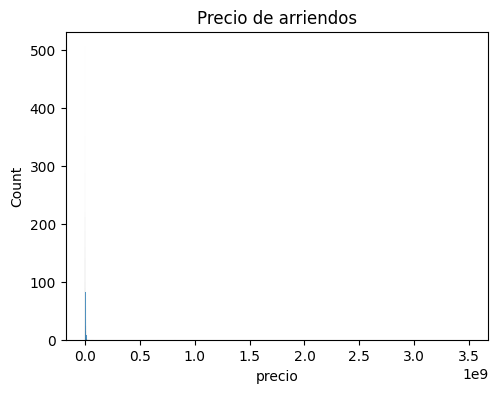

In [3]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Precio de arriendos')
sns.histplot(df_data['precio'])
plt.show()

In [4]:
iqr = iqr(df_data.precio, axis = 0, rng = (25, 75), interpolation = 'midpoint')
print(iqr)

3200000.0


In [5]:
q1 = np.percentile(df_data.precio, 25)
q3 = np.percentile(df_data.precio, 75)

min_limite = q1 - 1.5*iqr
max_limite = q3 + 1.5*iqr

print(f"q1 {q1} q3 {q3}")
print("Límites inferiores = ", min_limite)
print("Límites superiores = ", max_limite)

q1 1500000.0 q3 4700000.0
Límites inferiores =  -3300000.0
Límites superiores =  9500000.0


In [6]:
df_data = df_data[(df_data['precio'] > 500000) & (df_data['precio'] <= 7500000)]
df_data.reset_index()

index     precio  baños_familiares  area_bruta  numero_niveles   
0         0  1100000.0               1.0        95.0             1.0  \
1         1   950000.0               1.0        70.0             1.0   
2         2   970000.0               1.0        38.0             1.0   
3         3  1400000.0               1.0        50.0             1.0   
4         4   800000.0               1.0        92.0             1.0   
...     ...        ...               ...         ...             ...   
2859   3227  1250000.0               2.0        57.0             1.0   
2860   3228  1100000.0               2.0        54.0             1.0   
2861   3229  1100000.0               1.0        50.0             1.0   
2862   3230  1000000.0               2.0        53.0             1.0   
2863   3231  1200000.0               2.0        52.0             1.0   

      parqueaderos  alcobas_familiares  estrato  area_total   
0              0.0                 3.0      0.0        95.0  \
1              0.0                 2.0      3.0        70.0   
2              0.0                 1.0      4.0        38.0   
3              1.0                 2.0      0.0        50.0   
4              0.0                 3.0      2.0        92.0   
...            ...                 ...      ...         ...   
2859           0.0                 3.0      3.0        57.0   
2860           1.0                 3.0      3.0        54.0   
2861           0.0                 2.0      3.0        50.0   
2862           1.0                 3.0      3.0        53.0   
2863           1.0                 3.0      3.0        52.0   

      juegos_infantiles  ...  closet_de_linos  biblioteca   
0                   0.0  ...              1.0         1.0  \
1                   0.0  ...              0.0         0.0   
2                   0.0  ...              1.0         0.0   
3                   0.0  ...              1.0         1.0   
4                   0.0  ...              0.0         0.0   
...                 ...  ...              ...         ...   
2859                1.0  ...              0.0         0.0   
2860                1.0  ...              0.0         0.0   
2861                1.0  ...              0.0         0.0   
2862                1.0  ...              1.0         0.0   
2863                1.0  ...              1.0         0.0   

      parqueadero_visitantes  gimnasio  piscina  salon_social   
0                        0.0       0.0      0.0           0.0  \
1                        0.0       0.0      0.0           0.0   
2                        0.0       0.0      0.0           0.0   
3                        1.0       0.0      0.0           0.0   
4                        0.0       0.0      0.0           0.0   
...                      ...       ...      ...           ...   
2859                     1.0       0.0      0.0           1.0   
2860                     1.0       0.0      1.0           1.0   
2861                     0.0       1.0      0.0           0.0   
2862                     1.0       0.0      1.0           1.0   
2863                     1.0       0.0      1.0           1.0   

      dispositivos_automatizacion  alarma  tipo_cocina_freq  tipo_pisos_freq  
0                             0.0     0.0          0.861534         0.596709  
1                             0.0     0.0          0.081652         0.596709  
2                             0.0     0.0          0.081652         0.596709  
3                             0.0     0.0          0.861534         0.596709  
4                             0.0     0.0          0.861534         0.596709  
...                           ...     ...               ...              ...  
2859                          0.0     0.0          0.861534         0.596709  
2860                          0.0     0.0          0.861534         0.596709  
2861                          0.0     0.0          0.081652         0.596709  
2862                          0.0     0.0          0.861534         0.596709  
2

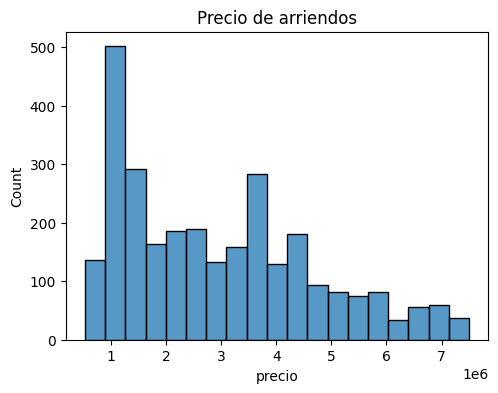

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Precio de arriendos')
sns.histplot(df_data['precio'])
plt.show()

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2864 entries, 0 to 3231
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       2864 non-null   float64
 1   baños_familiares             2864 non-null   float64
 2   area_bruta                   2864 non-null   float64
 3   numero_niveles               2864 non-null   float64
 4   parqueaderos                 2864 non-null   float64
 5   alcobas_familiares           2864 non-null   float64
 6   estrato                      2864 non-null   float64
 7   area_total                   2864 non-null   float64
 8   juegos_infantiles            2864 non-null   float64
 9   balcon                       2864 non-null   float64
 10  zona_ropas                   2864 non-null   float64
 11  camaras_cctv                 2864 non-null   float64
 12  cancha_polideportiva         2864 non-null   float64
 13  ascensor               

In [9]:
df_data.shape

(2864, 37)

In [10]:
df_data.isna().sum()

precio                         0
baños_familiares               0
area_bruta                     0
numero_niveles                 0
parqueaderos                   0
alcobas_familiares             0
estrato                        0
area_total                     0
juegos_infantiles              0
balcon                         0
zona_ropas                     0
camaras_cctv                   0
cancha_polideportiva           0
ascensor                       0
cancha_squash                  0
zona_bbq                       0
patio                          0
unidad_cerrada_conjunto        0
zonas_verdes                   0
aire_acondicionado             0
jacuzzi                        0
red_de_Gas                     0
turco                          0
porteria_24_7                  0
sauna                          0
calentador_de_agua             0
terraza                        0
closet_de_linos                0
biblioteca                     0
parqueadero_visitantes         0
gimnasio  

## Separación de las variables

In [11]:
pred_columns = [
    'baños_familiares',
    'area_bruta', 
    'numero_niveles',
    'parqueaderos', 
    'alcobas_familiares', 
    'estrato', 
    'area_total',
    'juegos_infantiles', 
    'balcon', 
    'zona_ropas', 
    'camaras_cctv',
    'cancha_polideportiva', 
    'ascensor', 
    'cancha_squash', 
    'zona_bbq',
    'patio', 
    'unidad_cerrada_conjunto', 
    'zonas_verdes',
    'aire_acondicionado', 
    'jacuzzi', 
    'red_de_Gas', 
    'turco', 
    'porteria_24_7',
    'sauna', 
    'calentador_de_agua', 
    'terraza', 
    'closet_de_linos',
    'biblioteca', 
    'parqueadero_visitantes', 
    'gimnasio', 
    'piscina',
    'salon_social', 
    'dispositivos_automatizacion', 
    'alarma',
    'tipo_cocina_freq', 
    'tipo_pisos_freq'
]
cat_features = ['juegos_infantiles','balcon','zona_ropas','camaras_cctv','cancha_polideportiva','ascensor','cancha_squash','zona_bbq','patio','unidad_cerrada_conjunto','zonas_verdes',
                'aire_acondicionado','jacuzzi','red_de_Gas','turco','porteria_24_7','sauna','calentador_de_agua','terraza','closet_de_linos','biblioteca','parqueadero_visitantes',
                'gimnasio','piscina','salon_social','dispositivos_automatizacion','alarma']
cat_number_fetures = ['baños_familiares', 'numero_niveles', 'parqueaderos', 'alcobas_familiares', 'estrato']
num_features = ['area_bruta', 'area_total','tipo_cocina_freq','tipo_pisos_freq']

In [12]:
df_data = df_data.reset_index(drop=True)
X = df_data[pred_columns]
Y = df_data[['precio']]

In [13]:
X.shape, Y.shape

((2864, 36), (2864, 1))

##

## Distribución de los datos

In [14]:
def plot_dist(data, columns, method = "hist", fig_zise = (15,8), num_rows = 2, num_cols = 3):
    columns_type = columns
    fig, axs = plt.subplots(nrows=num_rows,ncols=num_cols)
    fig.set_figwidth(fig_zise[0])
    fig.set_figheight(fig_zise[1])
    col = 0
    for i in range(0, num_rows):    
        for j in range(0, 3):
            try:
                if method == "dist":
                    sns.scatterplot(data[columns_type[col]], ax=axs[i,j])
                else:
                    sns.histplot(data[columns_type[col]], ax=axs[i,j])
            except IndexError:
                continue
            col += 1

### Variables numéricas

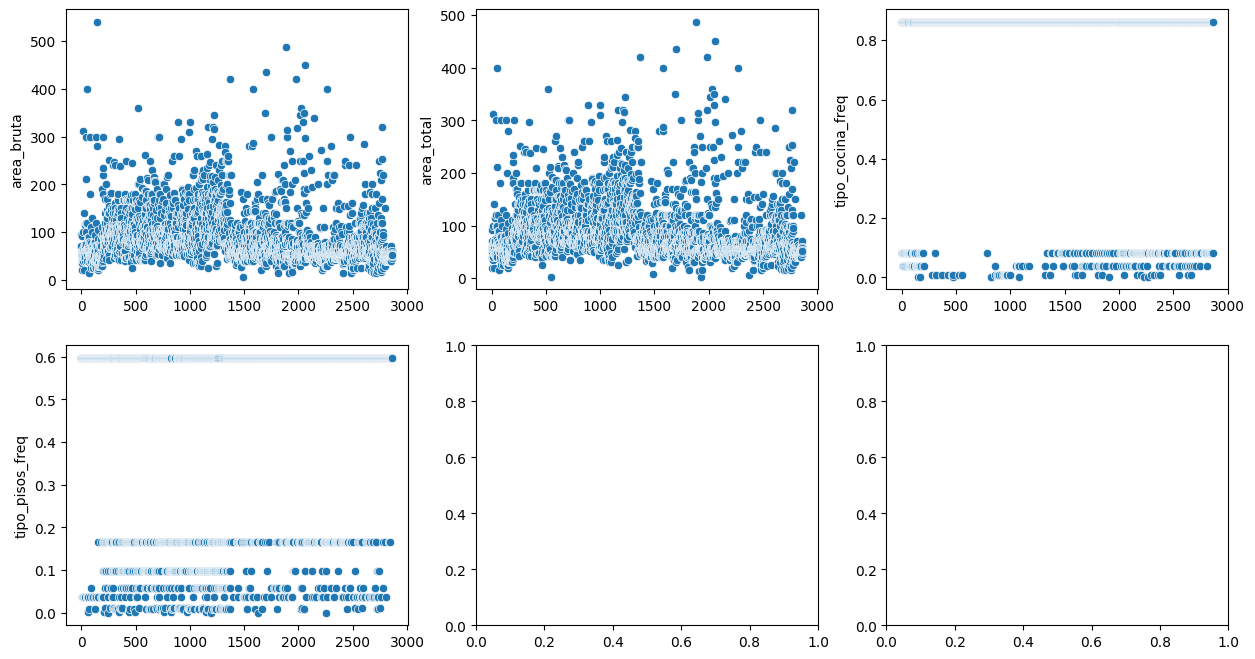

In [15]:
plot_dist(X, num_features, "dist")

### Categóricas numéricas

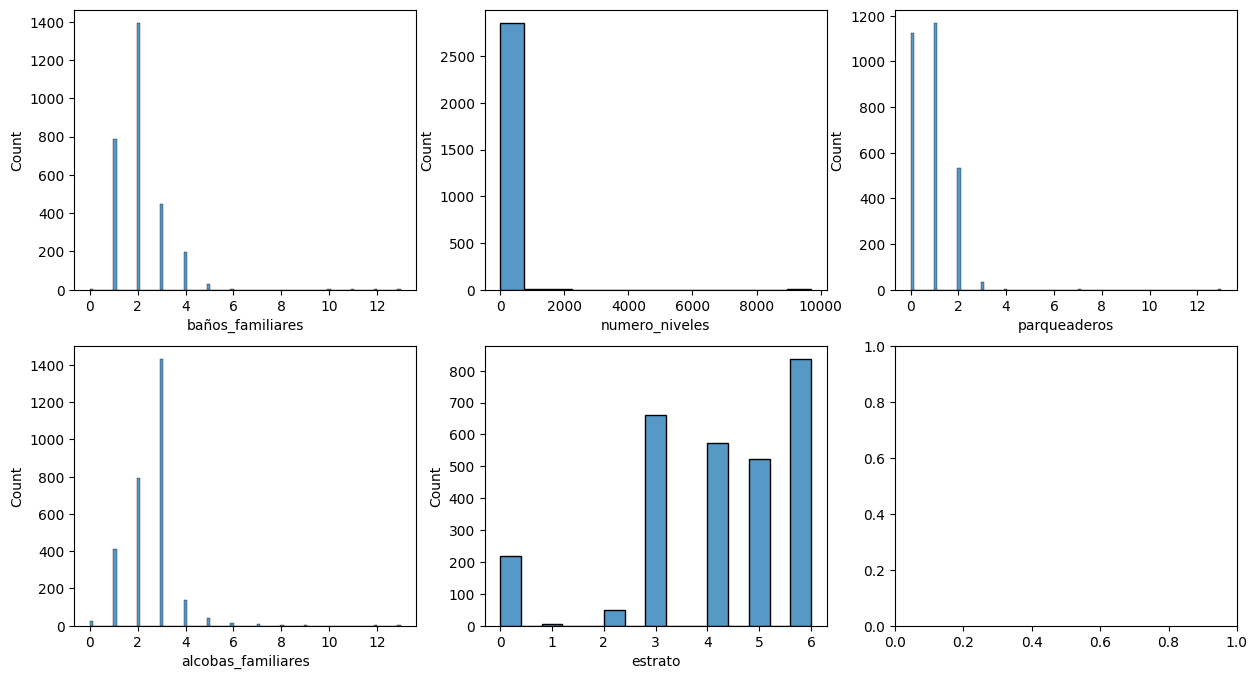

In [16]:
plot_dist(X, cat_number_fetures)

In [17]:
for cat in cat_number_fetures:
    print((X.groupby(cat).size()/X.shape[0])*100)
    print('\n')

baños_familiares
0.0      0.174581
1.0     27.409218
2.0     48.673184
3.0     15.572626
4.0      6.808659
5.0      1.082402
6.0      0.069832
10.0     0.034916
11.0     0.069832
12.0     0.069832
13.0     0.034916
dtype: float64


numero_niveles
0.0        0.034916
1.0       92.842179
2.0        3.491620
3.0        0.977654
4.0        0.418994
5.0        0.174581
6.0        0.104749
7.0        0.209497
8.0        0.139665
9.0        0.104749
11.0       0.069832
12.0       0.069832
13.0       0.069832
14.0       0.034916
15.0       0.104749
16.0       0.069832
18.0       0.034916
19.0       0.069832
20.0       0.069832
21.0       0.034916
22.0       0.069832
23.0       0.034916
24.0       0.069832
25.0       0.034916
26.0       0.034916
141.0      0.034916
201.0      0.034916
301.0      0.034916
302.0      0.069832
402.0      0.034916
404.0      0.034916
447.0      0.034916
501.0      0.034916
710.0      0.034916
805.0      0.034916
1011.0     0.034916
1706.0     0.034916
1712.0     0.

baños_familiares
- 0.0     =  0.165180
- 1.0     = 26.362735
- 2.0     = 46.845061
- 3.0     = 15.725140
- 4.0     =  8.952759
- 5.0     =  1.552692
- 6.0     =  0.132144
- 7.0     =  0.033036
- 10.0    =  0.066072
- 11.0    =  0.066072
- 12.0    =  0.066072
- 13.0    =  0.033036

numero_niveles
- 0.0      =  0.033036
- 1.0      = 92.798150
- 2.0      =  3.700033
- 3.0      =  0.925008
- 4.0      =  0.396432
- 5.0      =  0.165180
- 6.0      =  0.099108
- 7.0      =  0.231252
- 8.0      =  0.132144
- 9.0      =  0.099108
- 11.0     =  0.066072
- 12.0     =  0.066072
- 13.0     =  0.066072
- 14.0     =  0.033036
- 15.0     =  0.099108
- 16.0     =  0.066072
- 18.0     =  0.033036
- 19.0     =  0.066072
- 20.0     =  0.066072
- 21.0     =  0.033036
- 22.0     =  0.066072
- 23.0     =  0.033036
- 24.0     =  0.066072
- 25.0     =  0.033036
- 26.0     =  0.033036
- 141.0    =  0.033036
- 201.0    =  0.033036
- 301.0    =  0.033036
- 302.0    =  0.066072
- 402.0    =  0.033036
- 404.0    =  0.033036
- 447.0    =  0.033036
- 501.0    =  0.033036
- 710.0    =  0.033036
- 805.0    =  0.033036
- 1011.0   =  0.033036
- 1706.0   =  0.033036
- 1712.0   =  0.033036
- 2003.0   =  0.033036
- 2012.0   =  0.033036
- 2113.0   =  0.033036
- 9703.0   =  0.033036

parqueaderos
- 0.0    = 37.694087
- 1.0    = 39.940535
- 2.0    = 20.052858
- 3.0    =  2.015197
- 4.0    =  0.231252
- 7.0    =  0.033036
- 13.0   =  0.033036

alcobas_familiares
- 0.0    =  0.759828
- 1.0    = 13.842088
- 2.0    = 26.825240
- 3.0    = 50.710274
- 4.0    =  5.318797
- 5.0    =  1.453584
- 6.0    =  0.429468
- 7.0    =  0.330360
- 8.0    =  0.132144
- 9.0    =  0.033036
- 10.0   =  0.033036
- 12.0   =  0.099108
- 13.0   =  0.033036
dtype: float64


estrato
- 0.0   =  7.267922
- 1.0   =  0.165180
- 2.0   =  1.717872
- 3.0   = 21.902874
- 4.0   = 19.127849
- 5.0   = 17.938553
- 6.0   = 31.879749
dtype: float64

### Categóricas

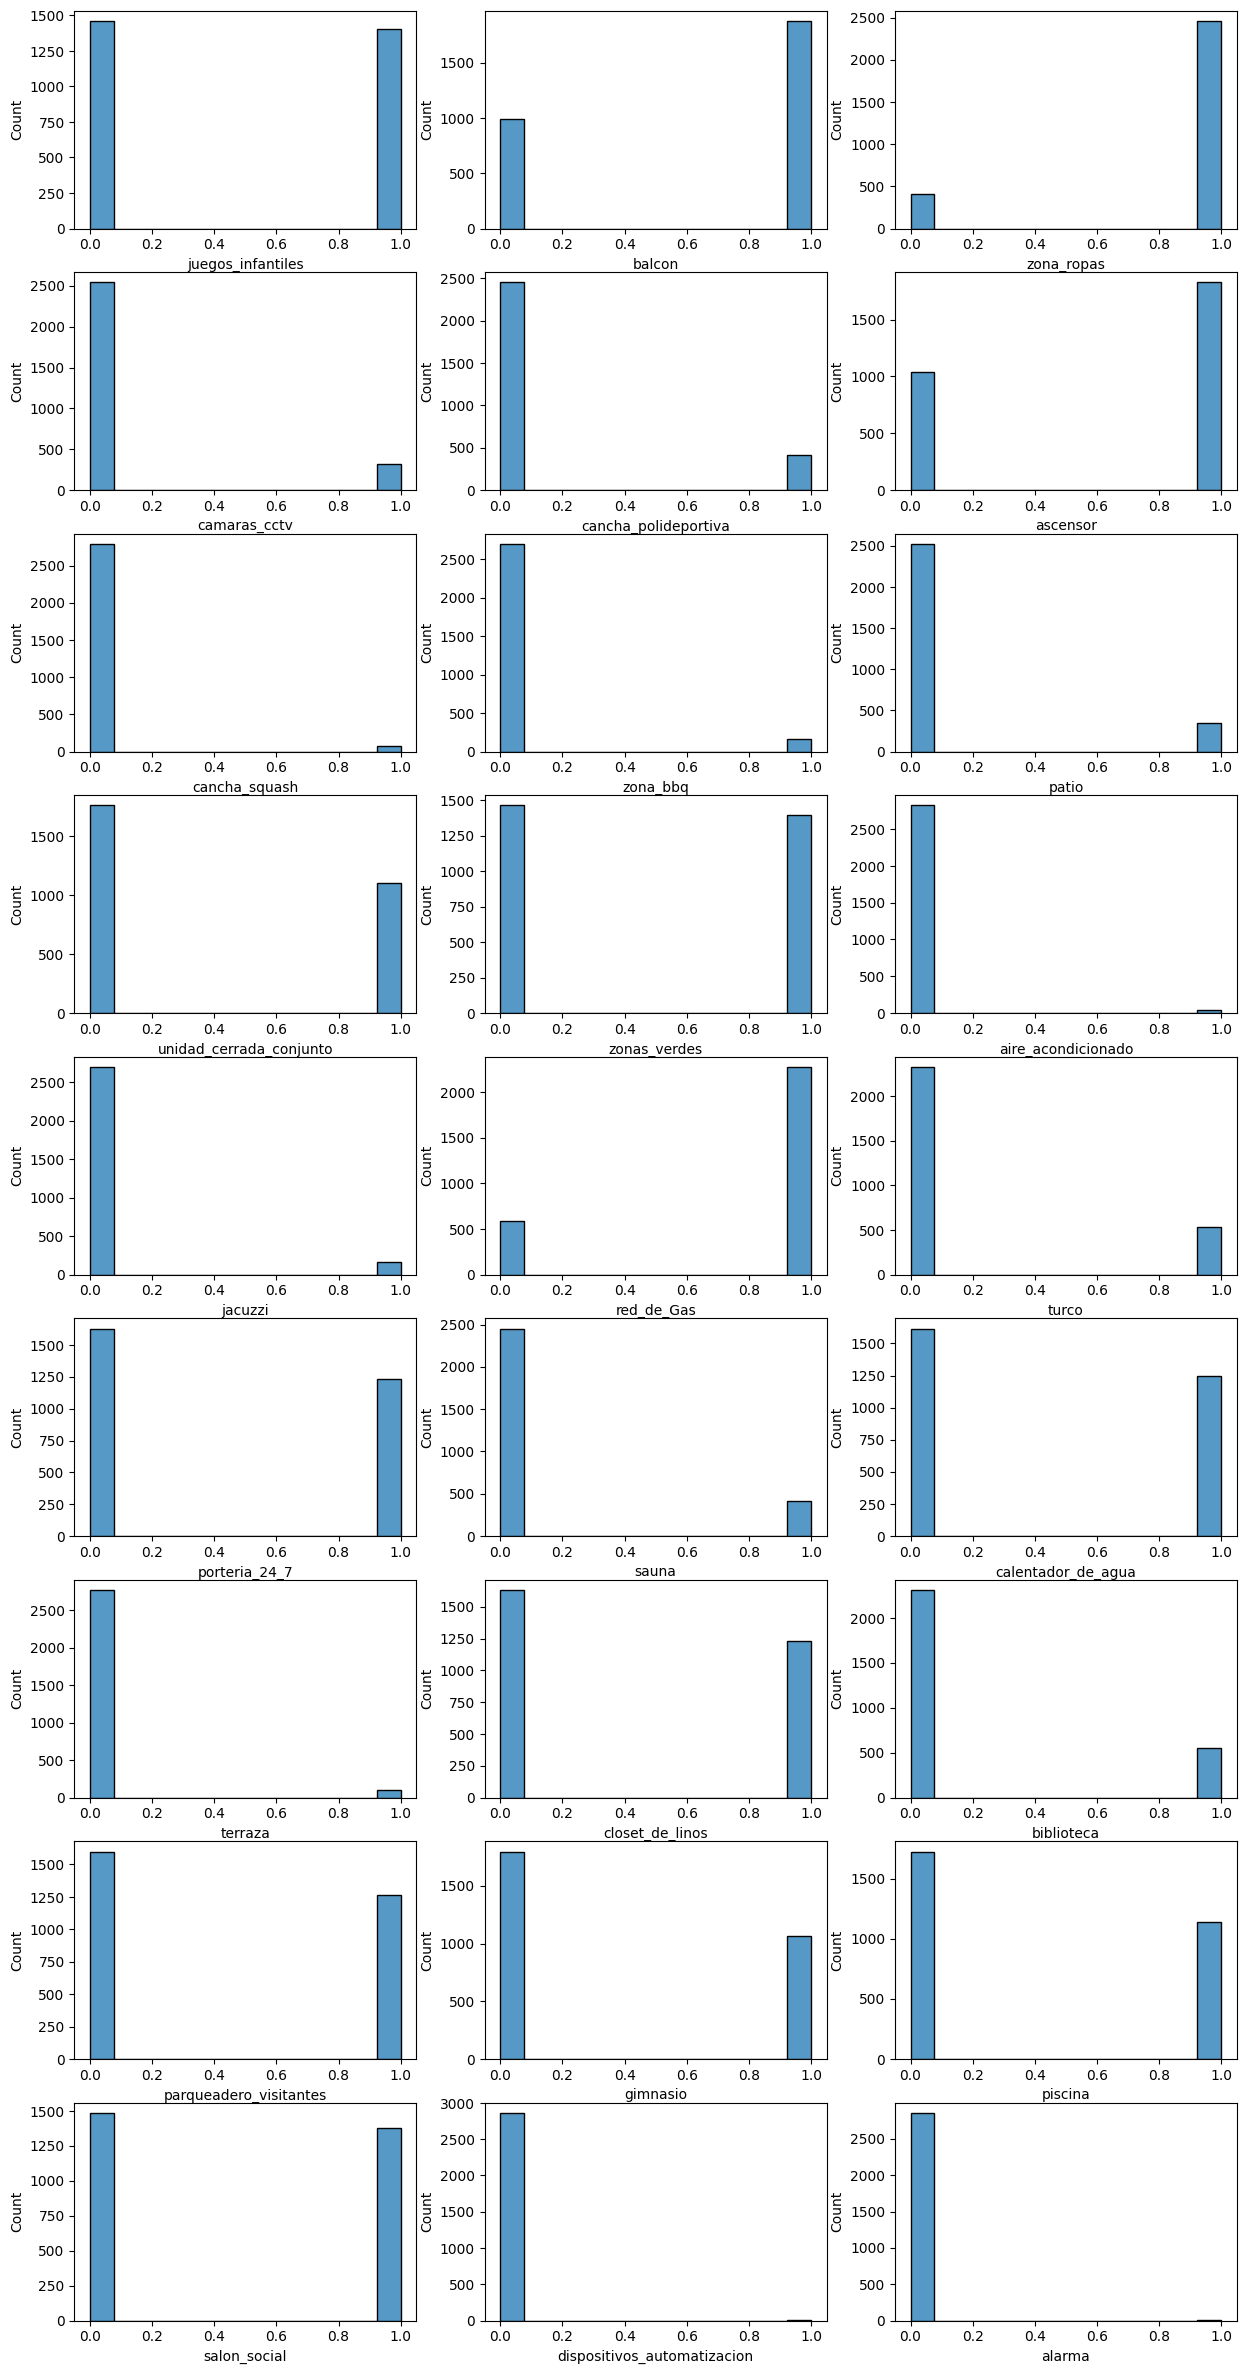

In [18]:
plot_dist(X, cat_features, fig_zise=(15,30), num_rows=9)

In [19]:
for cat in cat_features:
    print((X.groupby(cat).size()/X.shape[0])*100)
    print('\n')

juegos_infantiles
0.0    51.01257
1.0    48.98743
dtype: float64


balcon
0.0    34.462291
1.0    65.537709
dtype: float64


zona_ropas
0.0    14.106145
1.0    85.893855
dtype: float64


camaras_cctv
0.0    88.756983
1.0    11.243017
dtype: float64


cancha_polideportiva
0.0    85.649441
1.0    14.350559
dtype: float64


ascensor
0.0    36.173184
1.0    63.826816
dtype: float64


cancha_squash
0.0    97.416201
1.0     2.583799
dtype: float64


zona_bbq
0.0    94.238827
1.0     5.761173
dtype: float64


patio
0.0    88.093575
1.0    11.906425
dtype: float64


unidad_cerrada_conjunto
0.0    61.522346
1.0    38.477654
dtype: float64


zonas_verdes
0.0    51.117318
1.0    48.882682
dtype: float64


aire_acondicionado
0.0    98.53352
1.0     1.46648
dtype: float64


jacuzzi
0.0    94.099162
1.0     5.900838
dtype: float64


red_de_Gas
0.0    20.49581
1.0    79.50419
dtype: float64


turco
0.0    81.25
1.0    18.75
dtype: float64


porteria_24_7
0.0    56.913408
1.0    43.086592
dtype: float

Variables desbalanceadas

zona_ropas
- 0.0    = 13.90816
- 1.0    = 86.09184

camaras_cctv
- 0.0    = 88.272217
- 1.0    = 11.727783

cancha_polideportiva
- 0.0    = 85.629336
- 1.0    = 14.370664

cancha_squash
- 0.0    = 97.224975
- 1.0    = 2.775025

patio
- 0.0    = 88.272217
- 1.0    = 11.727783

aire_acondicionado
- 0.0    = 98.480344
- 1.0    =  1.519656

jacuzzi
- 0.0    = 93.987446
- 1.0    = 6.012554

red_de_Gas
- 0.0    = 20.746614
- 1.0    = 79.253386

turco
- 0.0    = 80.475719
- 1.0    = 19.524281

sauna
- 0.0    = 84.869508
- 1.0    = 15.130492

terraza
- 0.0    = 95.870499
- 1.0    = 4.129501

biblioteca
- 0.0   = 79.187314
- 1.0   = 20.812686

dispositivos_automatizacion
- 0.0   = 99.900892
- 1.0   =  0.099108

alarma
- 0.0    = 99.66964
- 1.0    = 0.33036

# Eliminacion de atípicos por variable individual

In [20]:
x_no_out = X[X['numero_niveles'] <= 3]
x_no_out = x_no_out[x_no_out['baños_familiares'] <= 5]
x_no_out = x_no_out[x_no_out['parqueaderos'] <= 3]
x_no_out = x_no_out[x_no_out['alcobas_familiares'] <= 5]
x_no_out = x_no_out[x_no_out['alcobas_familiares'] <= 5]
x_no_out.shape

(2751, 36)

In [21]:
y_no_out = Y.loc[x_no_out.index,:]
y_no_out.shape

(2751, 1)

In [22]:
y_no_out.isna().sum()

precio    0
dtype: int64

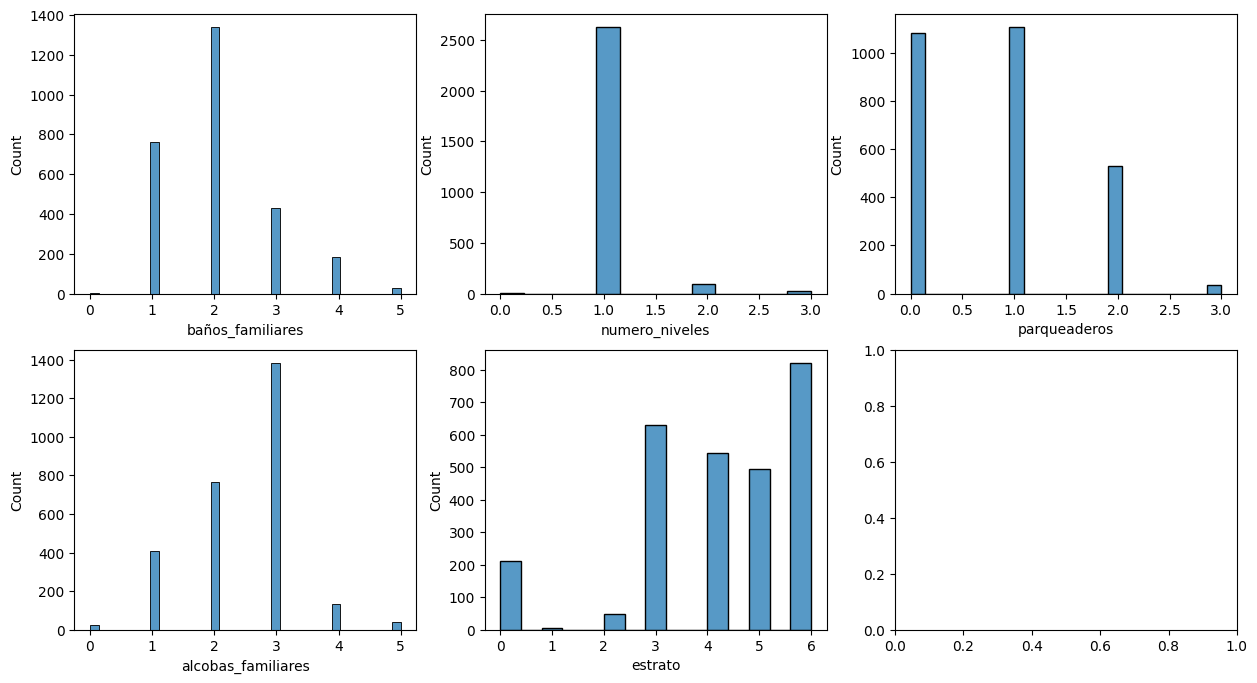

In [23]:
plot_dist(x_no_out, cat_number_fetures)

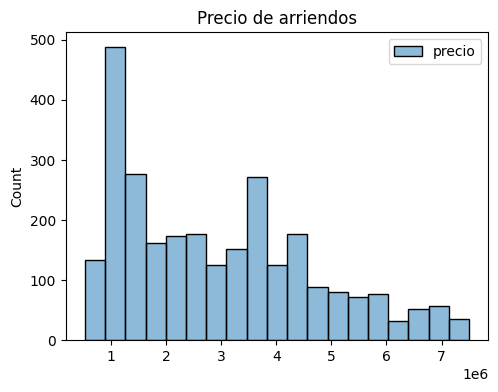

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Precio de arriendos')
sns.histplot(y_no_out) 
plt.show()

### Estandarización de variables predictoras

In [25]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
x_columns = X.columns
x_sclarer = scaler.fit_transform(x_no_out) # Transformación de los nuevos datos con una escala MinMax
x_sclarer = pd.DataFrame(x_sclarer, columns = x_columns)

In [26]:
x_sclarer.shape, y_no_out.shape

((2751, 36), (2751, 1))

## Correlación

### Correlación entre variables predictoras y variable salida

In [27]:
spearman = []
valor_p = []
for col in x_sclarer:
    s_valor, p_valor = spearmanr(x_sclarer[col], y_no_out)
    spearman.append(s_valor)
    valor_p.append(p_valor)

In [28]:
spearman = [abs(i) for i in spearman]

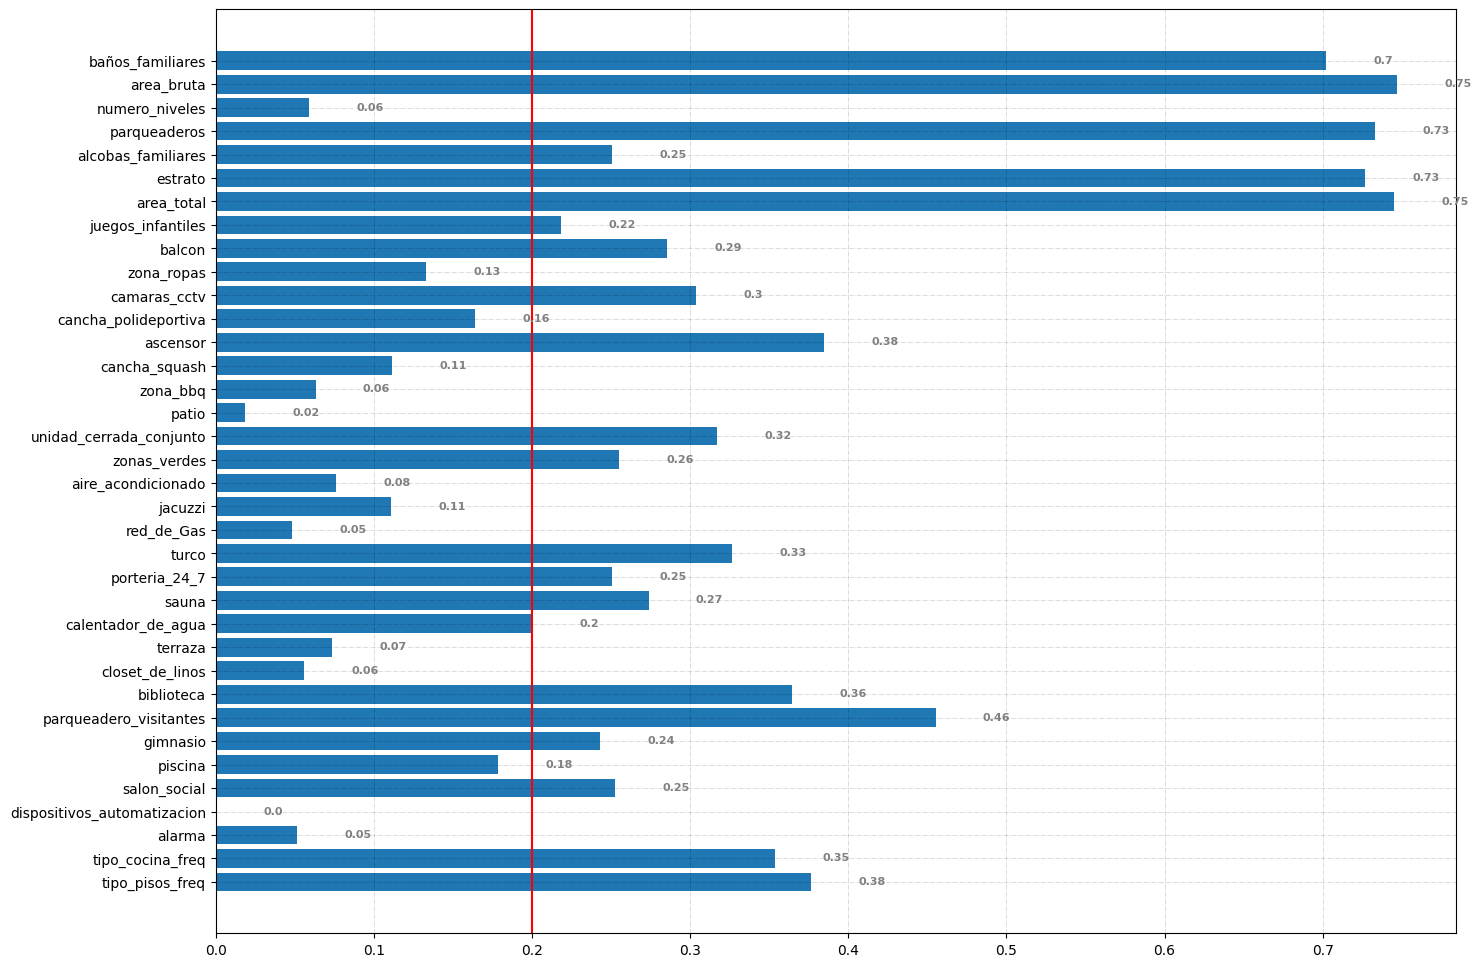

In [29]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 12))
# Horizontal Bar Plot
ax.barh(x_sclarer.columns, spearman)

# Add x, y gridlines
ax.grid( color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.03, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 8, fontweight ='bold',
             color ='grey')


plt.axvline(0.2,0,1,label='correlation limit',c='red')
# Show Plot
plt.show()

In [30]:
# Variables a descartar} por correlación con variable final
columns_disc_corr = [
    "numero_niveles",
    "cancha_squash",
    "aire_acondicionado",
    "jacuzzi",
    "terraza",
    "dispositivos_automatizacion",
    "alarma",
    "red_de_Gas",
    "zona_ropas",
    "cancha_polideportiva",
    "zona_bbq",
    "patio"
]

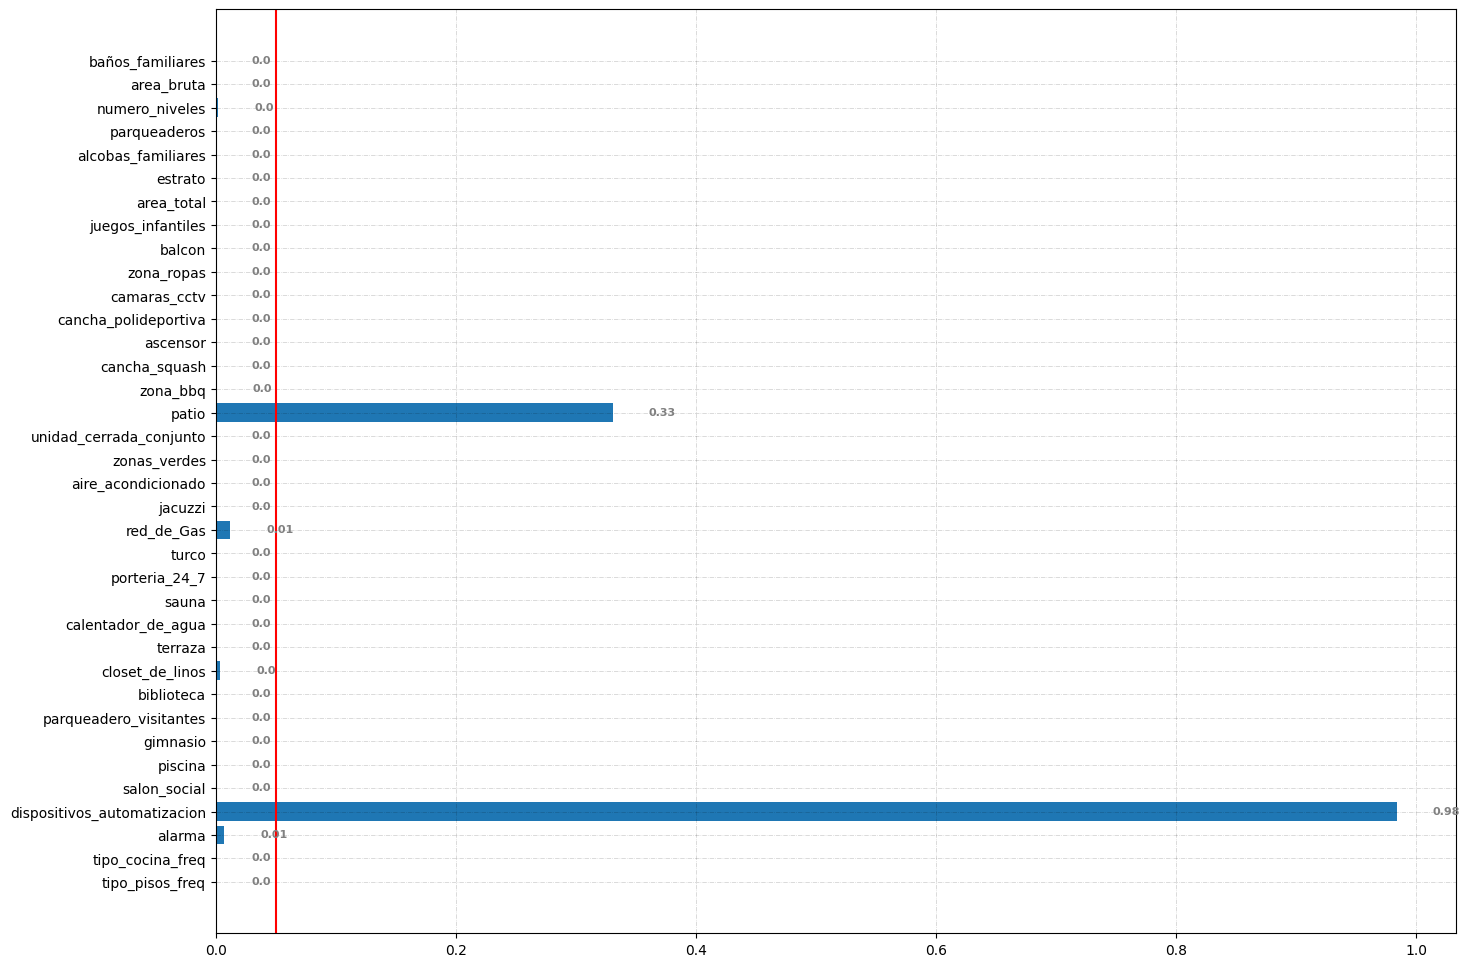

In [31]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 12))
# Horizontal Bar Plot
ax.barh(x_sclarer.columns, valor_p)

# Add x, y gridlines
ax.grid( color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.03, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 8, fontweight ='bold',
             color ='grey')


plt.axvline(0.05,0,1,label='correlation limit',c='red')
# Show Plot
plt.show()

### Correlación entre variables predictoras

In [32]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer.values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

In [33]:
corr = 0
columns = list(x_sclarer.columns)
for i in columns:
    for j in columns:
        if spearman_num[corr] >= 0.7 and i != j:
            print("{} vs {}: {}".format(i, j, spearman_num[corr]))
        corr += 1

baños_familiares vs area_bruta: 0.774596839284559
baños_familiares vs area_total: 0.772171911220186
area_bruta vs baños_familiares: 0.7745968392845589
area_bruta vs area_total: 0.9977924165867139
area_total vs baños_familiares: 0.772171911220186
area_total vs area_bruta: 0.9977924165867139
juegos_infantiles vs zonas_verdes: 0.7178837932100675
juegos_infantiles vs salon_social: 0.7295516077123261
unidad_cerrada_conjunto vs porteria_24_7: 0.8099172713758526
zonas_verdes vs juegos_infantiles: 0.7178837932100675
porteria_24_7 vs unidad_cerrada_conjunto: 0.8099172713758525
salon_social vs juegos_infantiles: 0.7295516077123261


#### Correlación Numéricas

In [34]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer[num_features].values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

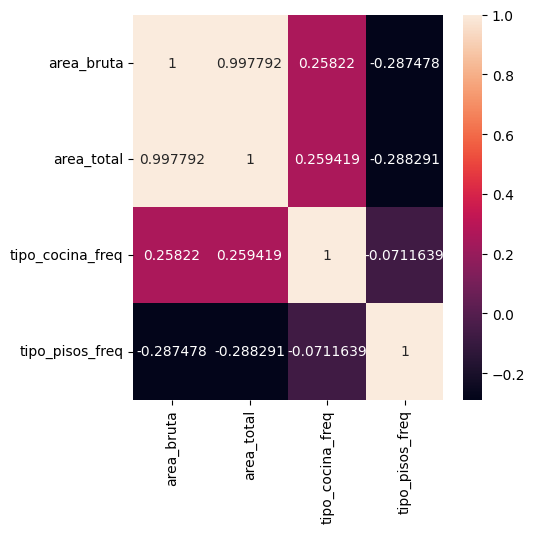

In [35]:
spearman_num = np.asarray(spearman_num)
valor_p_num = np.asarray(valor_p_num)

spearman_r = spearman_num.reshape(data_num.shape[1],data_num.shape[1])
p_value = valor_p_num.reshape(data_num.shape[1],data_num.shape[1])

plt.figure(figsize=(5,5))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = num_features, yticklabels = num_features)
plt.show()

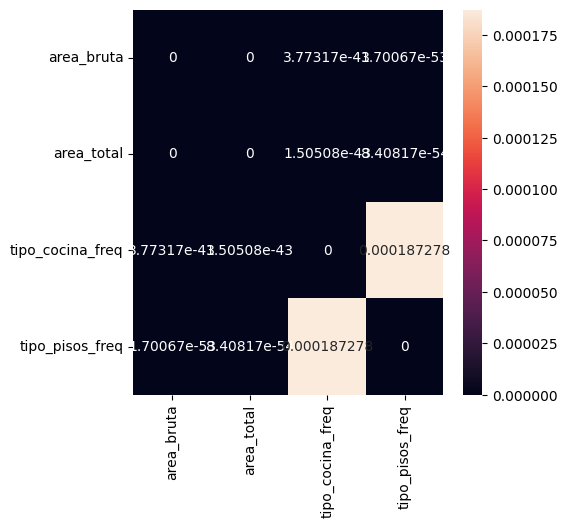

In [36]:
plt.figure(figsize=(5,5))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = num_features, yticklabels = num_features)
plt.show()

Variables altamente correlacionadas:

- area_total - area_bruta: Valor de correlación alto y valor de p significativo

In [37]:
columns_disc_corr.append("area_total")

#### Correlación Numéricas Categóricas

In [38]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer[cat_number_fetures].values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

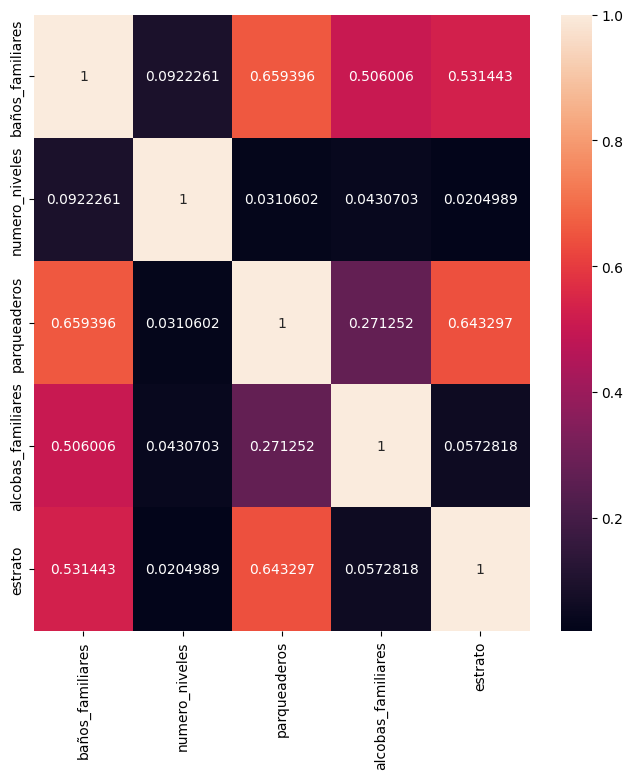

In [39]:
spearman_num = np.asarray(spearman_num)
valor_p_num = np.asarray(valor_p_num)

spearman_r = spearman_num.reshape(data_num.shape[1],data_num.shape[1])
p_value = valor_p_num.reshape(data_num.shape[1],data_num.shape[1])

plt.figure(figsize=(8,8))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = cat_number_fetures, yticklabels = cat_number_fetures)
plt.show()

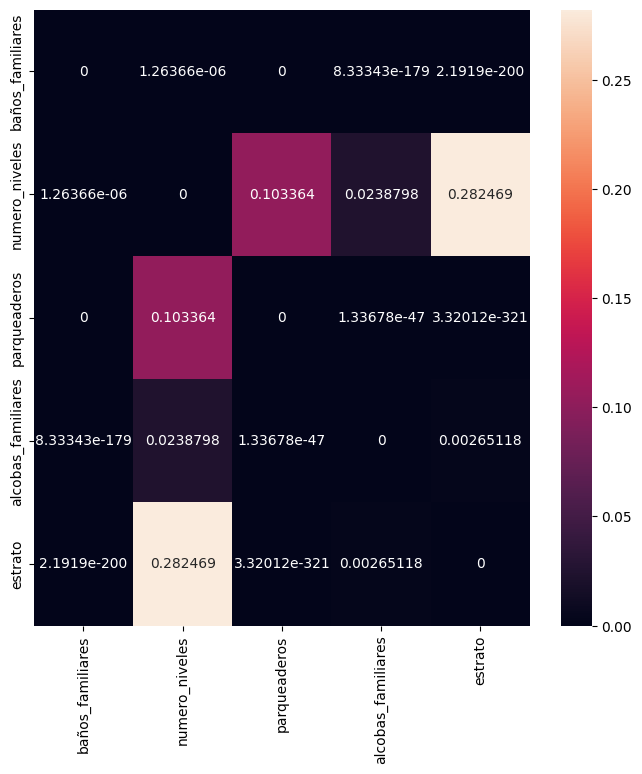

In [40]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = cat_number_fetures, yticklabels = cat_number_fetures)
plt.show()

NO se optiene variables altamente correlacionadas, sin embargo queda pendiente explorar métodos de correlación de variables categóricas

#### Correlación categoricas

In [41]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer[cat_features].values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

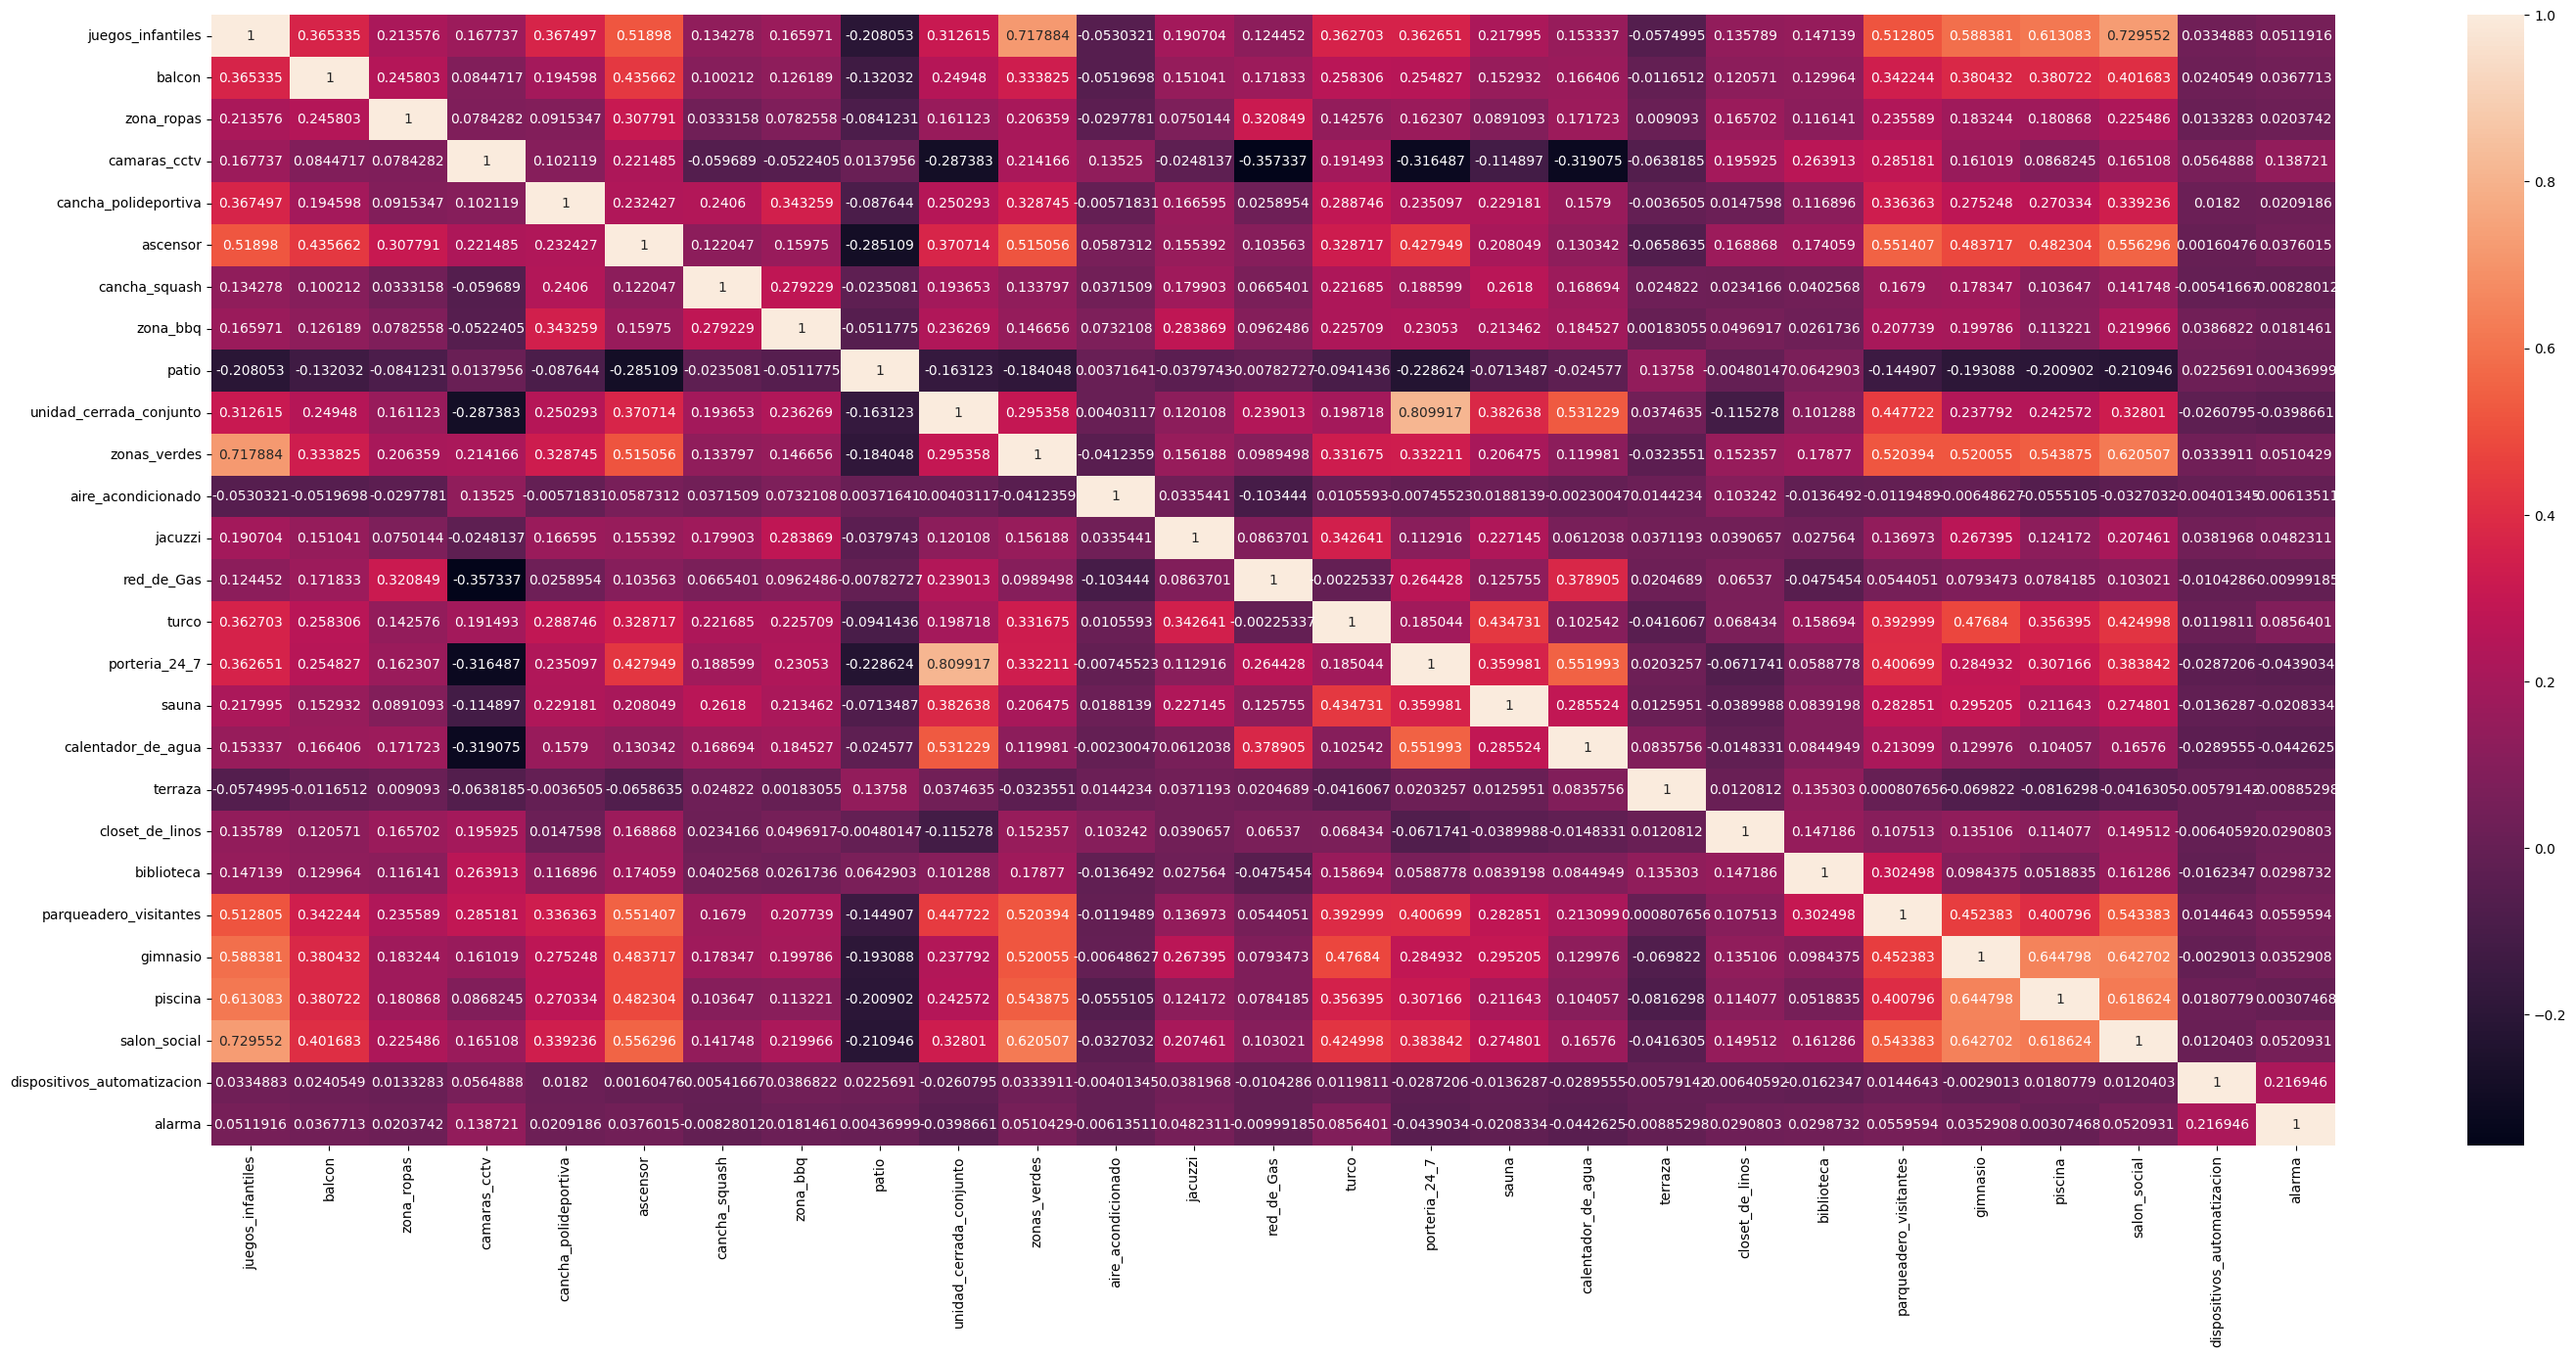

In [42]:
spearman_num = np.asarray(spearman_num)
valor_p_num = np.asarray(valor_p_num)

spearman_r = spearman_num.reshape(data_num.shape[1],data_num.shape[1])
p_value = valor_p_num.reshape(data_num.shape[1],data_num.shape[1])

plt.figure(figsize=(35,15))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = cat_features, yticklabels = cat_features)
plt.show()

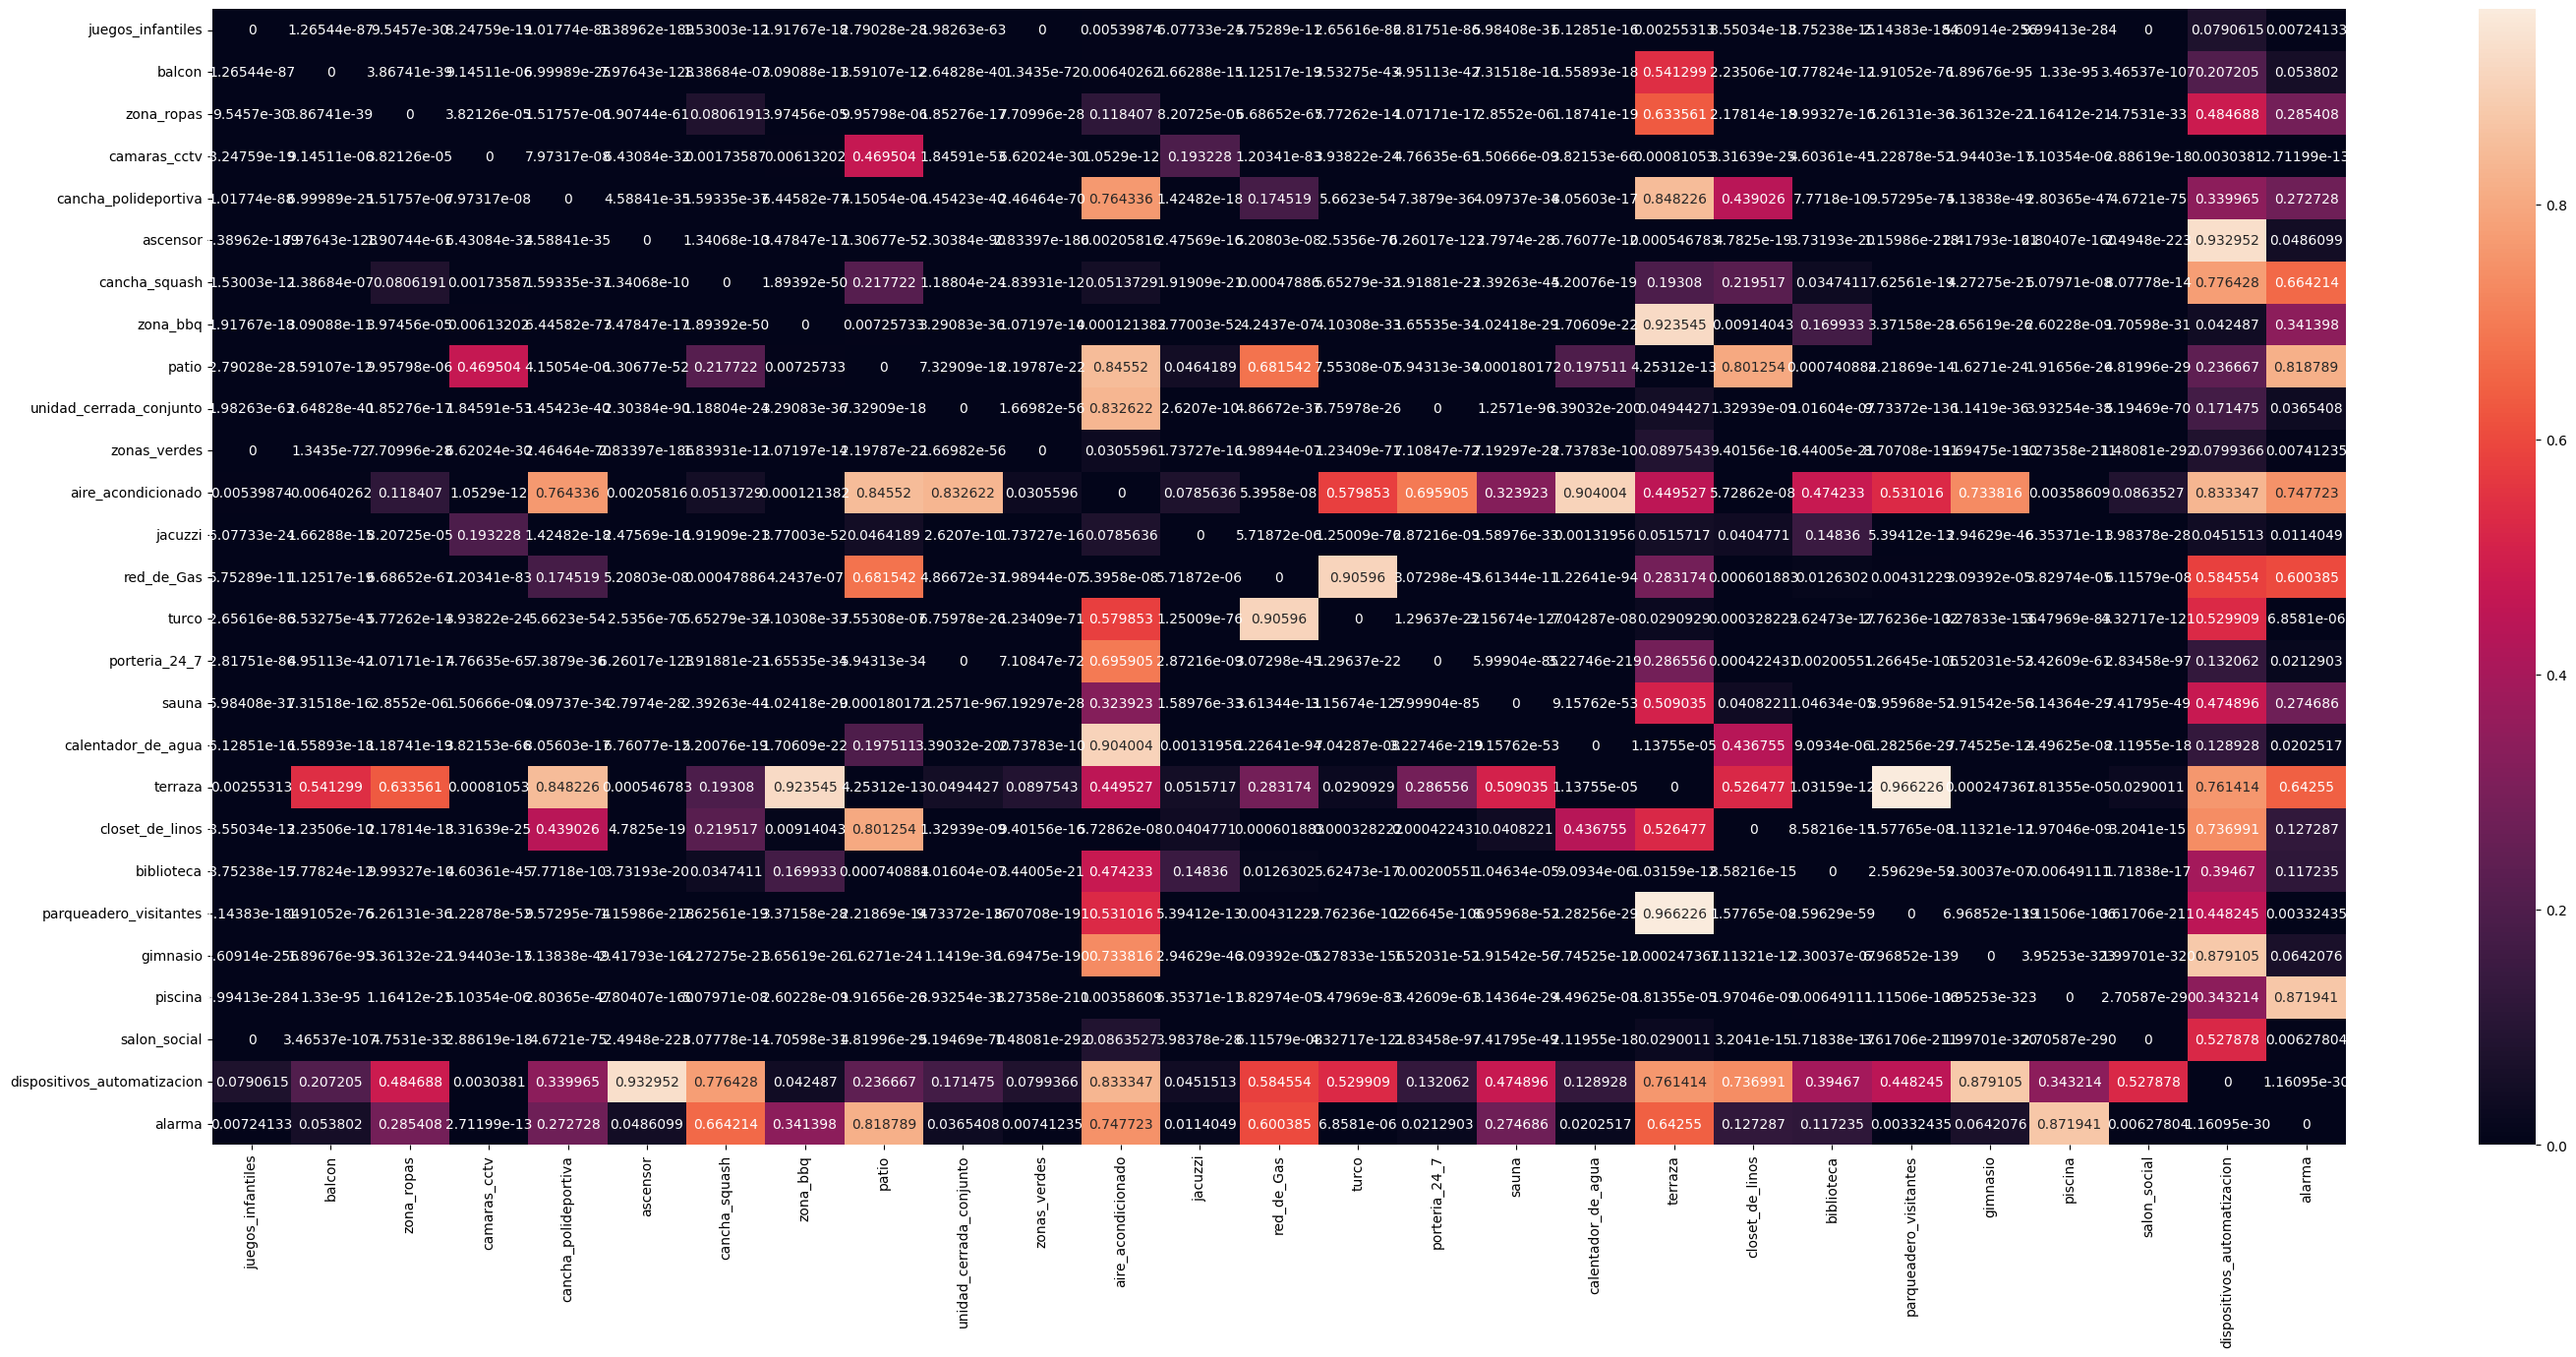

In [43]:
plt.figure(figsize=(35,15))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = cat_features, yticklabels = cat_features)
plt.show()

Correlacion entre variables:
- zonas_verdes - juegos_infantiles
- juegos_infantiles - salon social
- unidad_cerrada_conjunto - porteria_24_7

In [44]:
columns_disc_corr.append("porteria_24_7")

In [45]:
columns_disc_corr

['numero_niveles',
 'cancha_squash',
 'aire_acondicionado',
 'jacuzzi',
 'terraza',
 'dispositivos_automatizacion',
 'alarma',
 'red_de_Gas',
 'zona_ropas',
 'cancha_polideportiva',
 'zona_bbq',
 'patio',
 'area_total',
 'porteria_24_7']

In [46]:
cat_features = ['juegos_infantiles','balcon','camaras_cctv','ascensor','unidad_cerrada_conjunto','zonas_verdes',
                'turco','sauna','calentador_de_agua','closet_de_linos','biblioteca','parqueadero_visitantes',
                'gimnasio','piscina','salon_social']
cat_number_fetures = ['baños_familiares', 'parqueaderos', 'alcobas_familiares', 'estrato']
num_features = ['area_bruta','tipo_cocina_freq','tipo_pisos_freq']

##  Clustering

In [47]:
# Range of the cluster number to implement the iterations
range_n_clusters = [2,3,4,5,6,7]

In [48]:
def plot_clusters(X: np.ndarray, k_models:dict, range_n_clusters: list)->None:
    """
    Function to plot the silhouette metric

    PARAMS:
        X: np.ndarray
            Input Data
        k_models: dict
            Dictionary with models trained, eah key has the models for k clusters
        range_n_clusters: list of numbers of clusters
    """
    for n_clusters in range_n_clusters:
        for model in k_models[n_clusters]:
            # Create a subplot with 1 row and 2 columns
            fig, (ax1, ax2) = plt.subplots(1, 2)
            fig.set_size_inches(18, 7)

            # The 1st subplot is the silhouette plot
            # The silhouette coefficient can range from -1, 1 but in this example all
            # lie within [-0.1, 1]
            ax1.set_xlim([-0.1, 1])
            # The (n_clusters+1)*10 is for inserting blank space between silhouette
            # plots of individual clusters, to demarcate them clearly.
            ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


            # Initialize the clusterer with n_clusters value and a random generator
            # seed of 10 for reproducibility.
            clusterer = model[0]
            cluster_labels = model[1]

            # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
            try:
                silhouette_avg = silhouette_score(X, cluster_labels)
            except Exception as e:
                print("Error in silhouette for model ", model[2])
                continue
            print(model[2])
            print(
                "For n_clusters =",
                n_clusters,
                "The average silhouette_score is :",
                silhouette_avg,
            )

            # Compute the silhouette scores for each sample
            sample_silhouette_values = silhouette_samples(X, cluster_labels)
            

            y_lower = 10
            for i in range(n_clusters):
                # Aggregate the silhouette scores for samples belonging to
                # cluster i, and sort them
                ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

                ith_cluster_silhouette_values.sort()

                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                y_upper = y_lower + size_cluster_i

                color = cm.nipy_spectral(float(i) / n_clusters)
                ax1.fill_betweenx(
                    np.arange(y_lower, y_upper),
                    0,
                    ith_cluster_silhouette_values,
                    facecolor=color,
                    edgecolor=color,
                    alpha=0.7,
                )

                # Label the silhouette plots with their cluster numbers at the middle
                ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

                # Compute the new y_lower for next plot
                y_lower = y_upper + 10  # 10 for the 0 samples

            ax1.set_title("The silhouette plot for the various clusters.")
            ax1.set_xlabel("The silhouette coefficient values")
            ax1.set_ylabel("Cluster label")

            # The vertical line for average silhouette score of all the values
            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

            ax1.set_yticks([])  # Clear the yaxis labels / ticks
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

            # 2nd Plot showing the actual clusters formed
            colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax2.scatter(
                X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
            )

            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")

            plt.suptitle(
                "Silhouette analysis for {} clustering on sample data with n_clusters = {}".format(model[2], n_clusters),
                fontsize=14,
                fontweight="bold",
            )

        plt.show()

In [49]:
data_fomated = x_sclarer.copy()
data_fomated["precio"] = y_no_out.values

### Kmeans num features

In [61]:
X = data_fomated[["precio", "area_bruta"]].values
k_models = {}
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []

    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans_labels = kmeans.fit_predict(X)
    models.append((kmeans,kmeans_labels,'KMEANS'))
    k_models[k] = models
print("Training complete!")

Training 2 clusters ...
Training 3 clusters ...
Training 4 clusters ...
Training 5 clusters ...
Training 6 clusters ...
Training 7 clusters ...
Training complete!


KMEANS
For n_clusters = 2 The average silhouette_score is : 0.6309783776750223


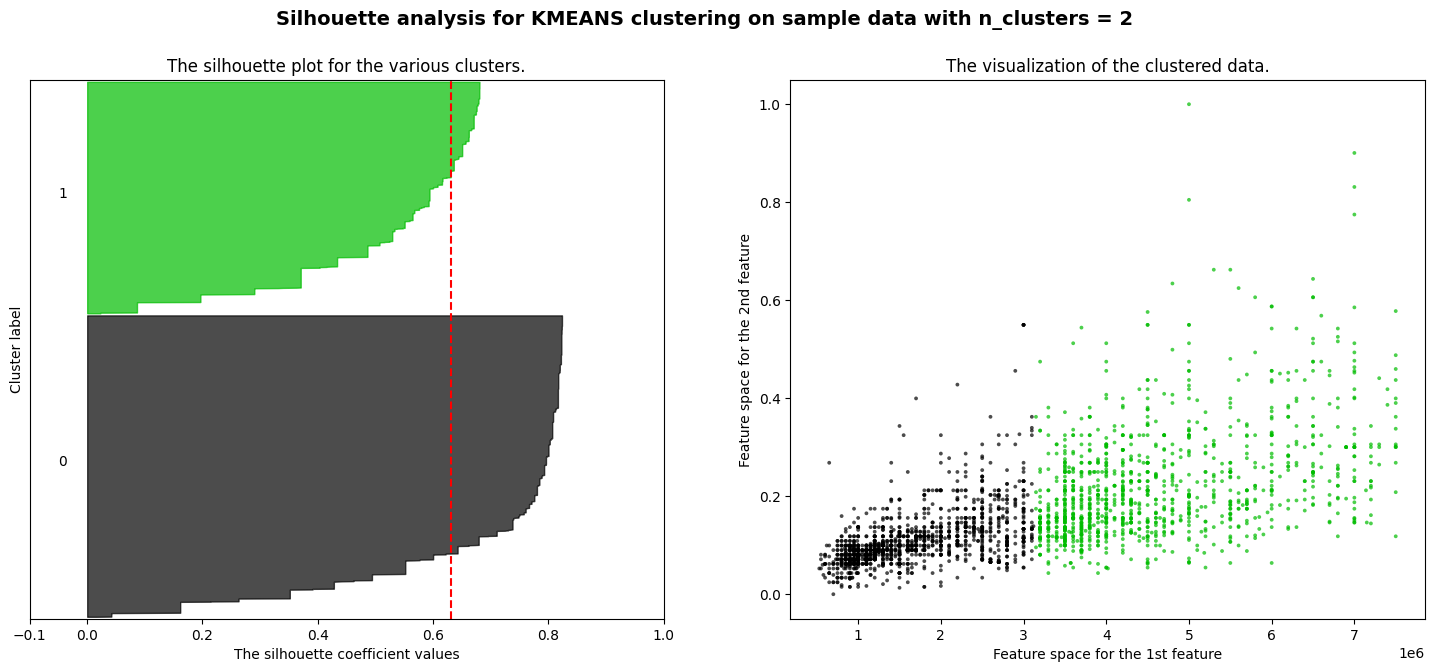

KMEANS
For n_clusters = 3 The average silhouette_score is : 0.6346643773007279


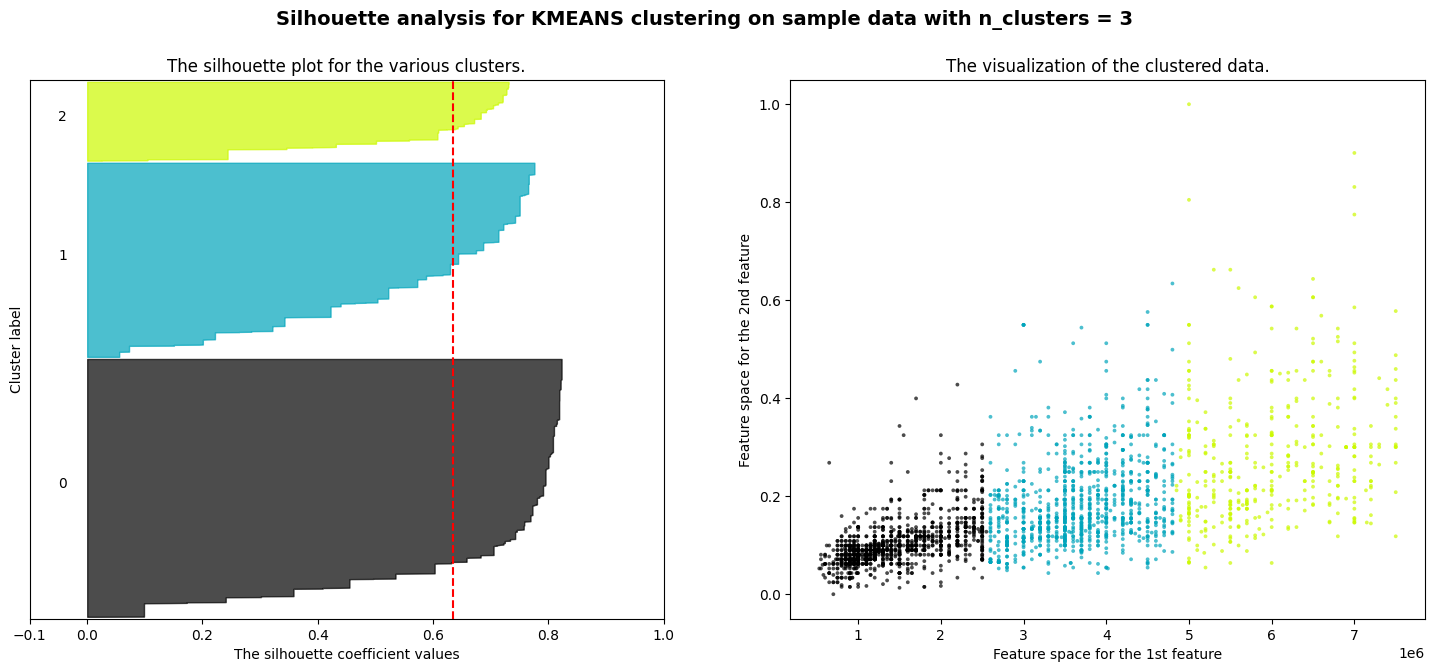

KMEANS
For n_clusters = 4 The average silhouette_score is : 0.5995122570359377


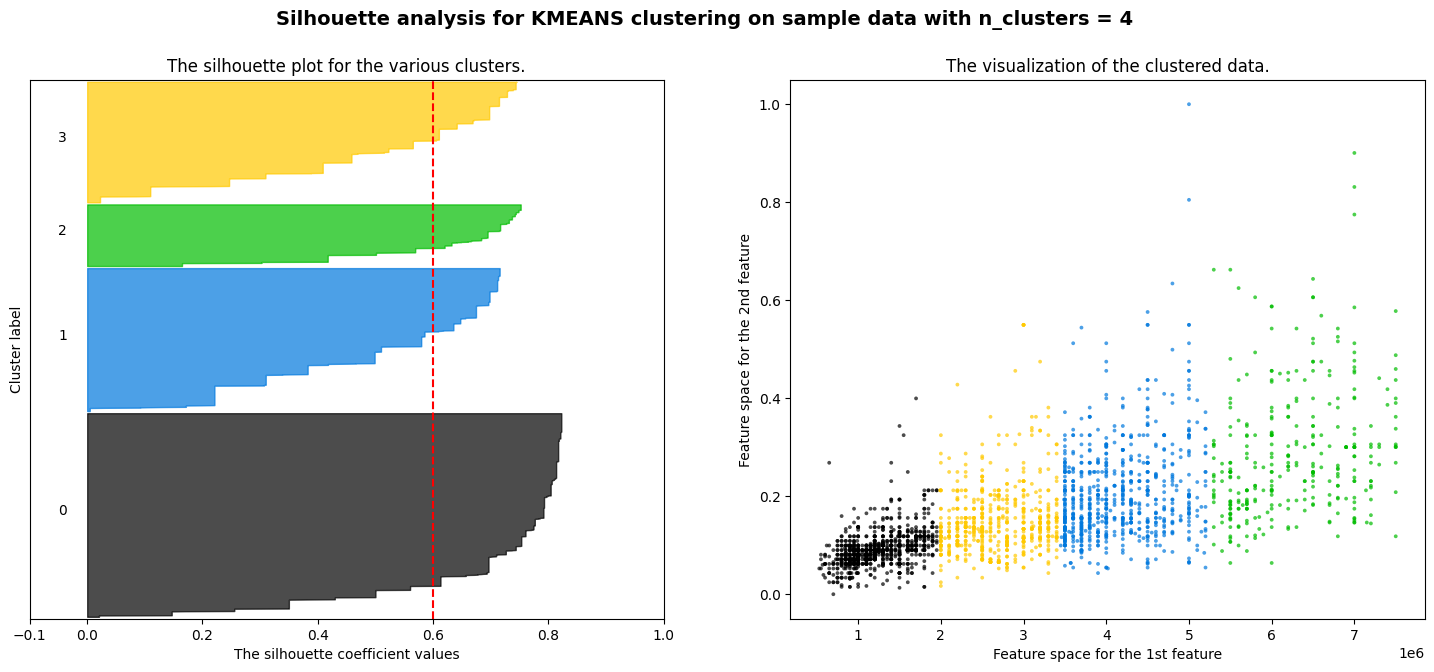

KMEANS
For n_clusters = 5 The average silhouette_score is : 0.5975799571805435


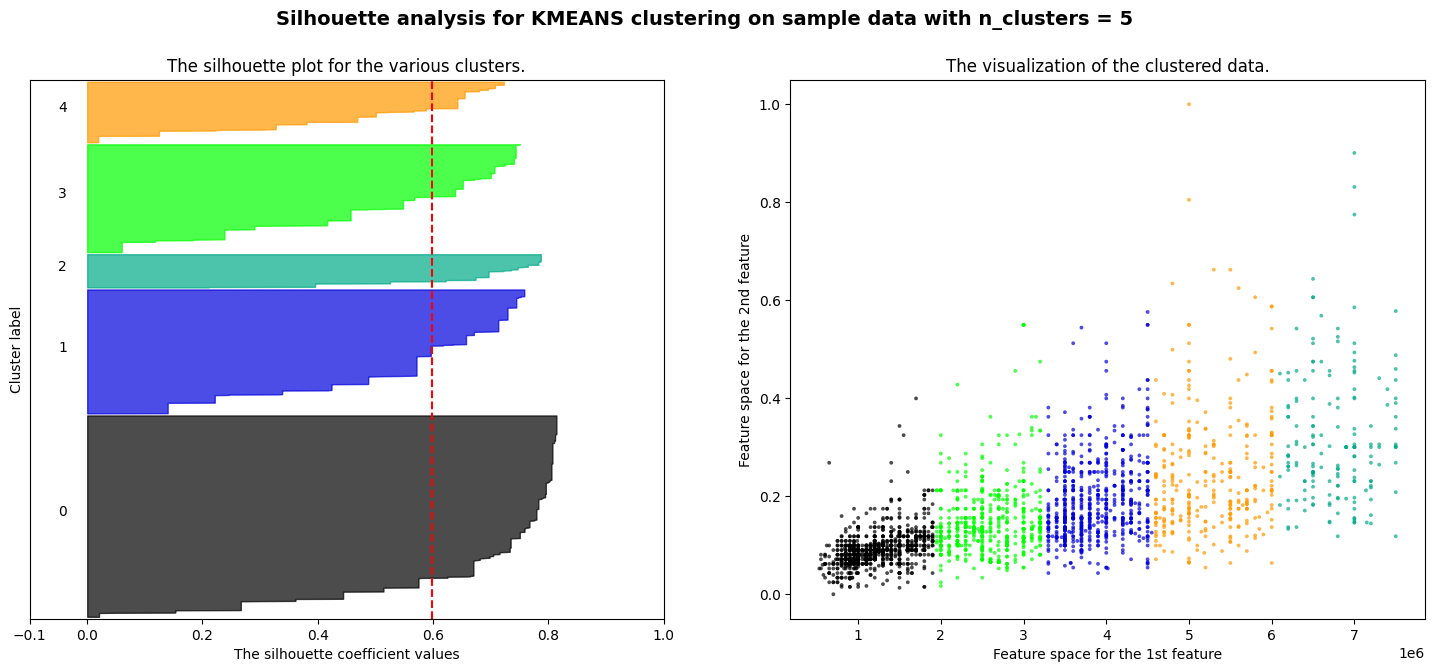

KMEANS
For n_clusters = 6 The average silhouette_score is : 0.603600465182238


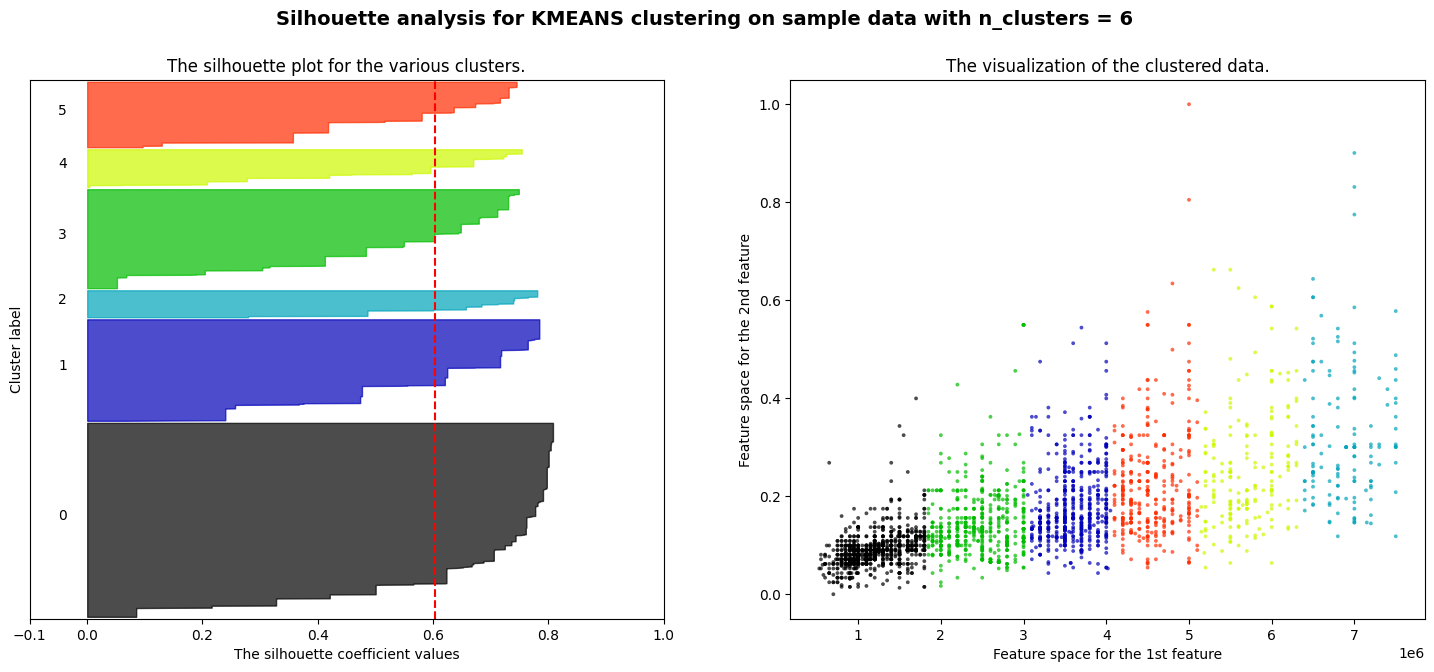

KMEANS
For n_clusters = 7 The average silhouette_score is : 0.5686147984365694


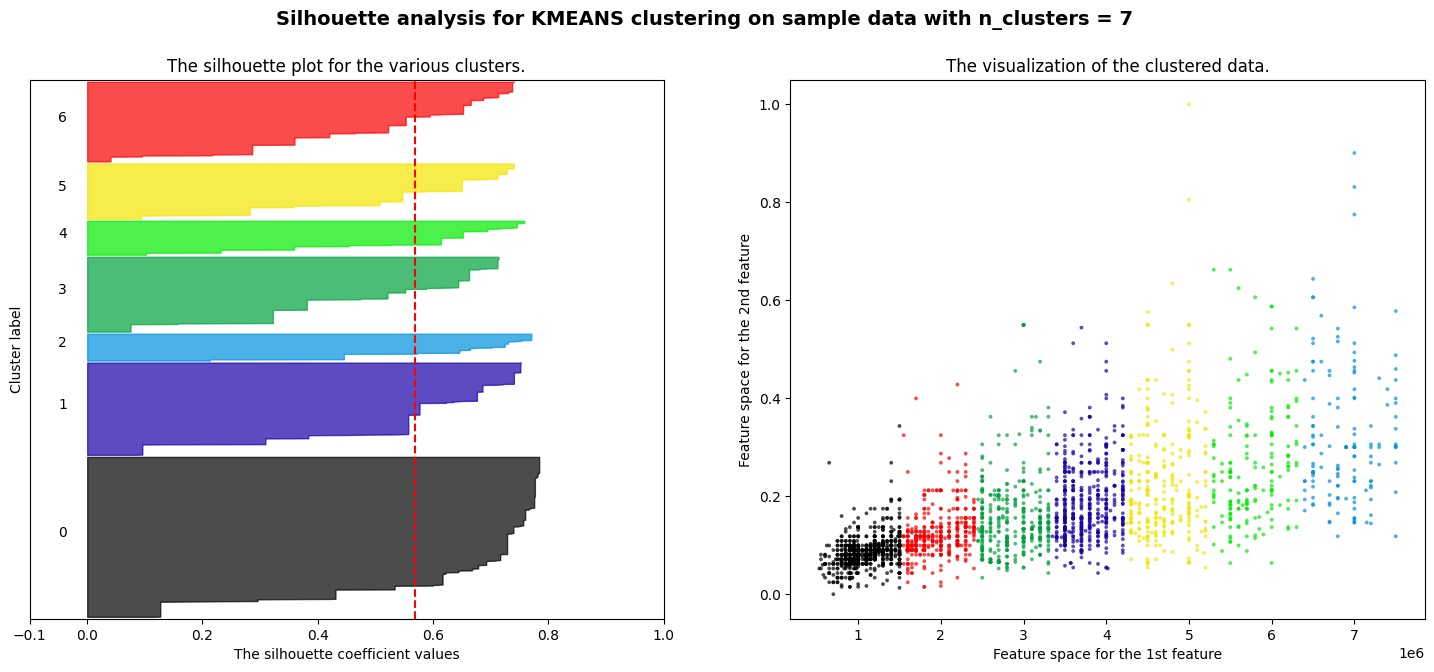

In [62]:
plot_clusters(X, k_models, range_n_clusters)

In [73]:
kmeas_labesl = k_models[3][0][1]
np.unique(kmeas_labesl)

array([0, 1, 2])

In [81]:
data_price_area = data_fomated[["precio", "area_bruta"]].copy()
data_price_area['cluster'] = kmeas_labesl
data_price_area.head()

precio  area_bruta  cluster
0  1100000.0    0.165103        0
1   950000.0    0.118199        0
2   970000.0    0.058161        0
3  1400000.0    0.080675        0
4   800000.0    0.159475        0

Training 2 clusters ...
Training 3 clusters ...
Training 4 clusters ...
Training 5 clusters ...
Training 6 clusters ...
Training 7 clusters ...
Training complete!
KMEANS
For n_clusters = 2 The average silhouette_score is : 0.6613985444571278


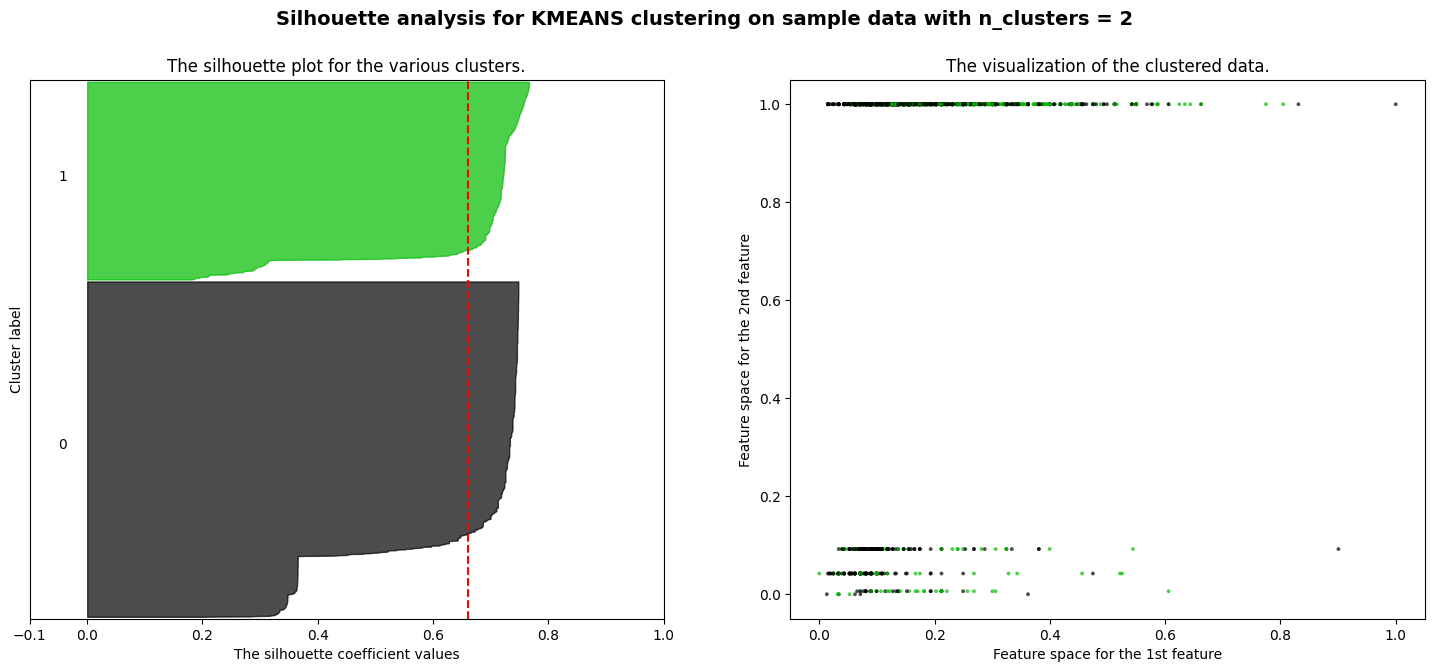

KMEANS
For n_clusters = 3 The average silhouette_score is : 0.812211454801926


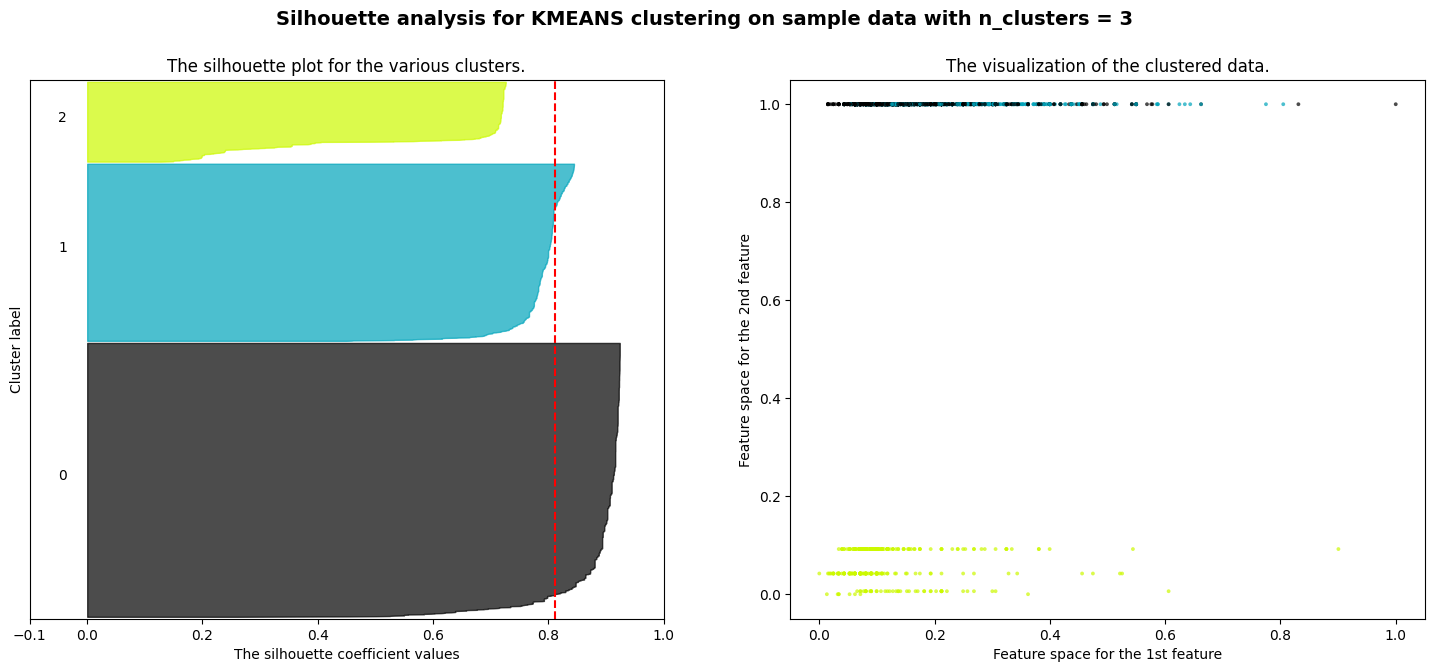

KMEANS
For n_clusters = 4 The average silhouette_score is : 0.8553358073019003


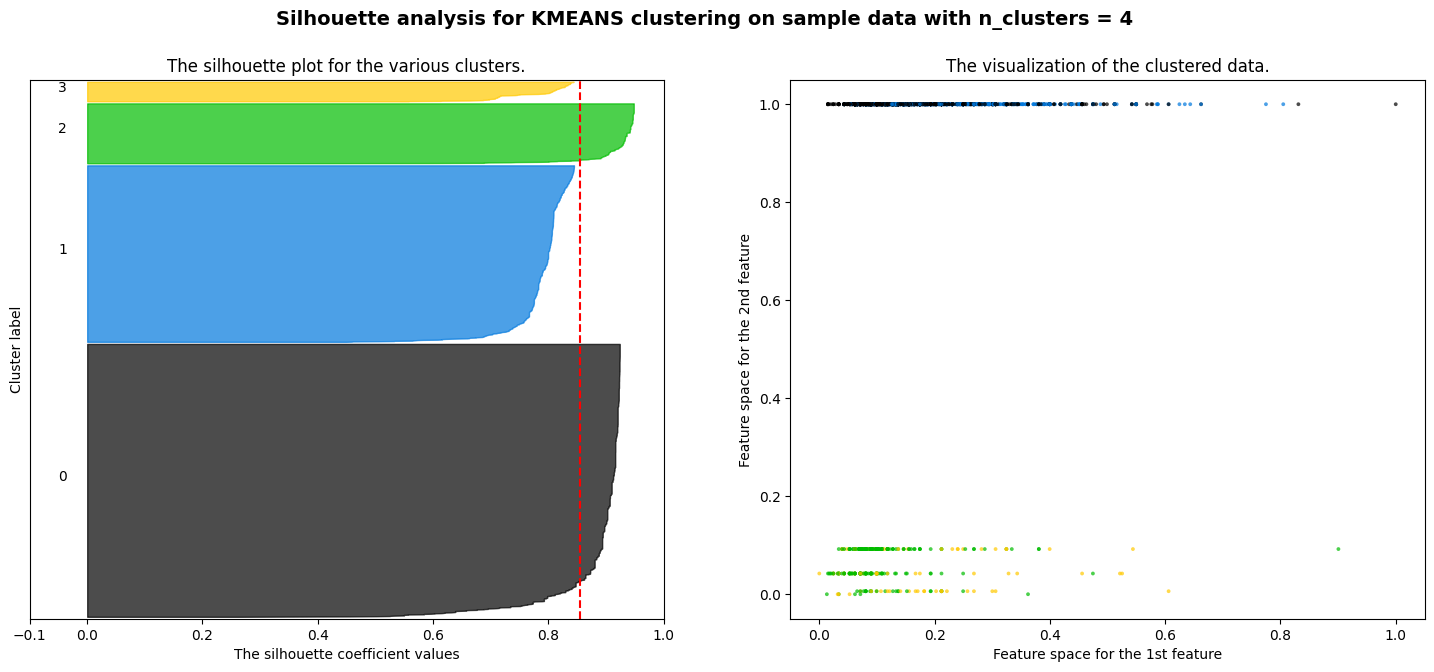

KMEANS
For n_clusters = 5 The average silhouette_score is : 0.7419851625461457


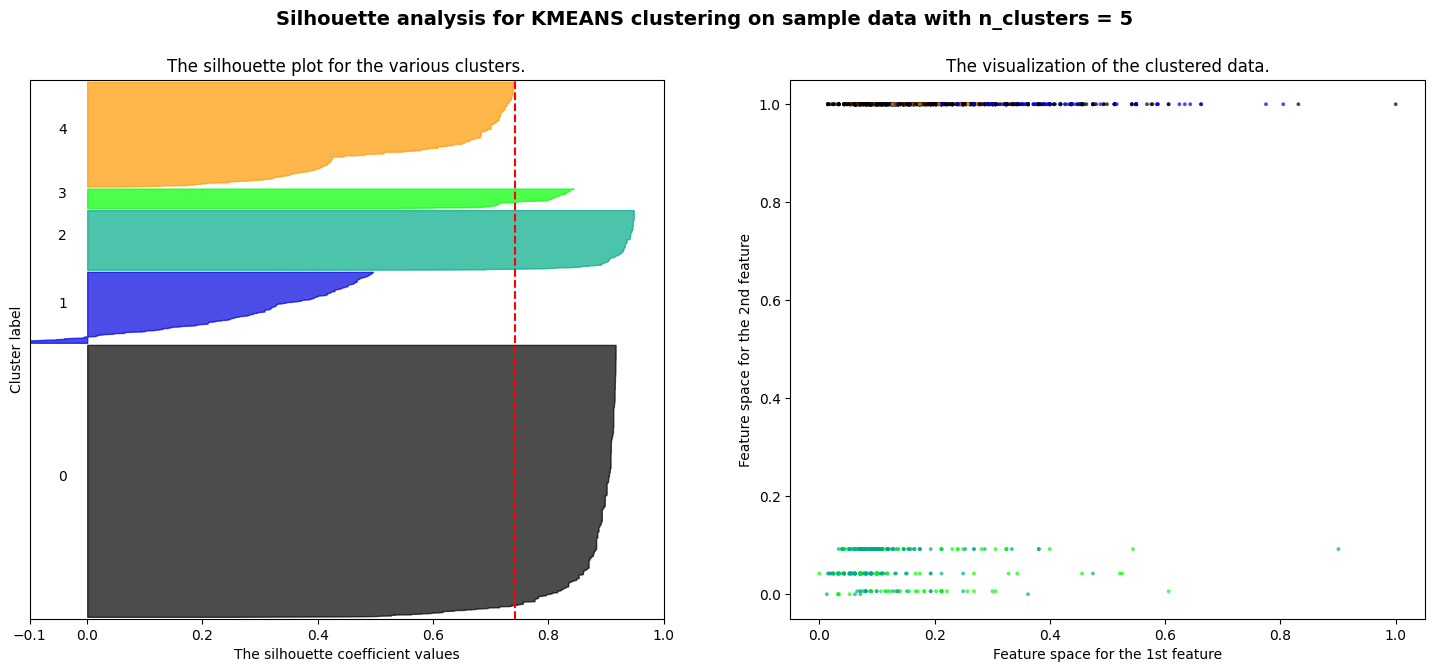

KMEANS
For n_clusters = 6 The average silhouette_score is : 0.7485796914793847


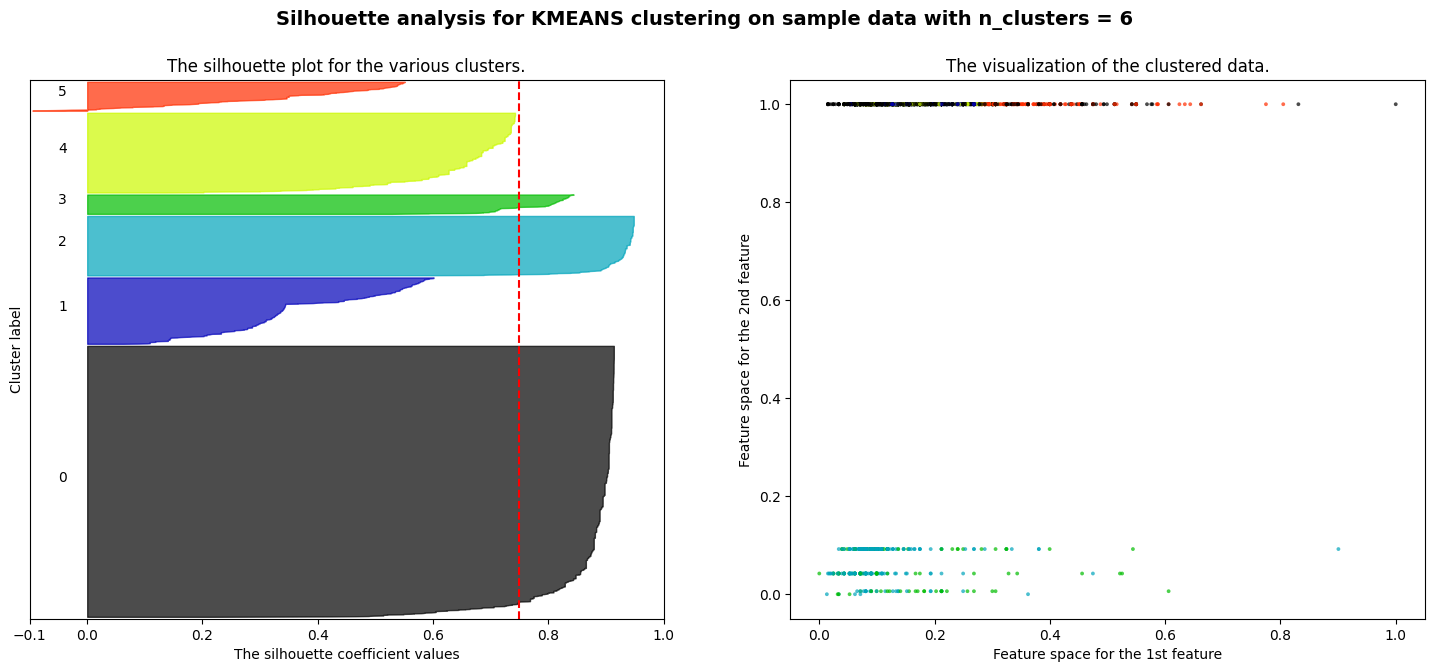

KMEANS
For n_clusters = 7 The average silhouette_score is : 0.7330377222483551


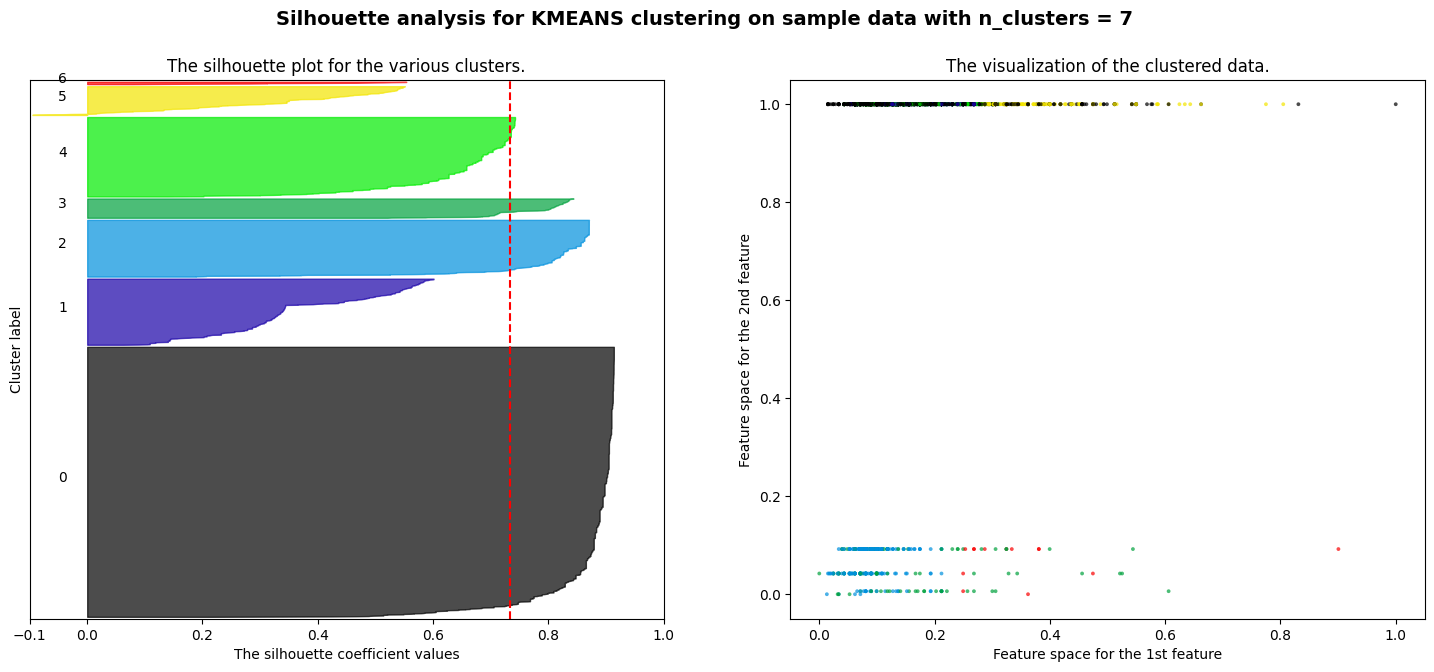

In [52]:
X = data_fomated[num_features].values
k_models = {}
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []

    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans_labels = kmeans.fit_predict(X)
    models.append((kmeans,kmeans_labels,'KMEANS'))
    k_models[k] = models
print("Training complete!")
plot_clusters(X, k_models, range_n_clusters)

## 

### Kmodes cat num features

In [53]:
X = data_fomated[cat_number_fetures].values
k_models = {}
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []

    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    kmodes_labels = kmodes.fit_predict(X)
    models.append((kmodes,kmodes_labels,'KMODES'))
    k_models[k] = models
print("Training complete!")

Training 2 clusters ...
Training 3 clusters ...
Training 4 clusters ...
Training 5 clusters ...
Training 6 clusters ...
Training 7 clusters ...
Training complete!


KMODES
For n_clusters = 2 The average silhouette_score is : 0.27551075202233005


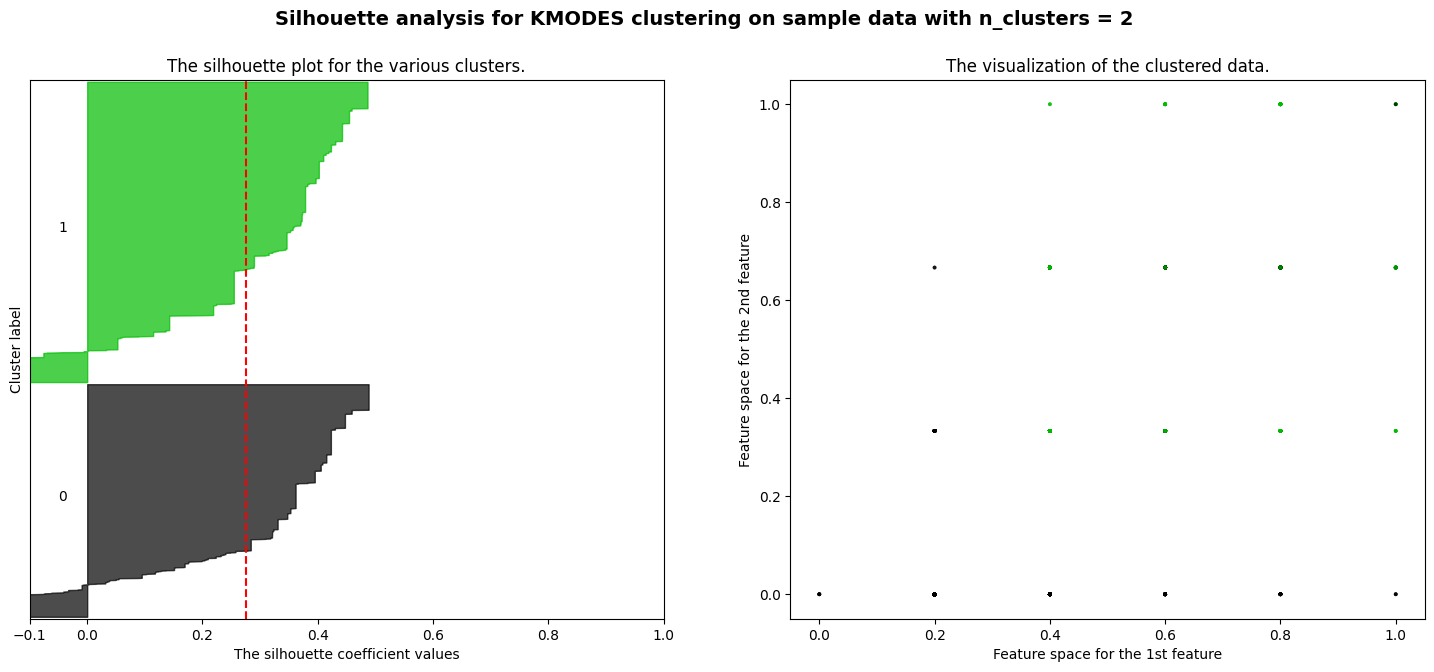

KMODES
For n_clusters = 3 The average silhouette_score is : 0.28196154555681135


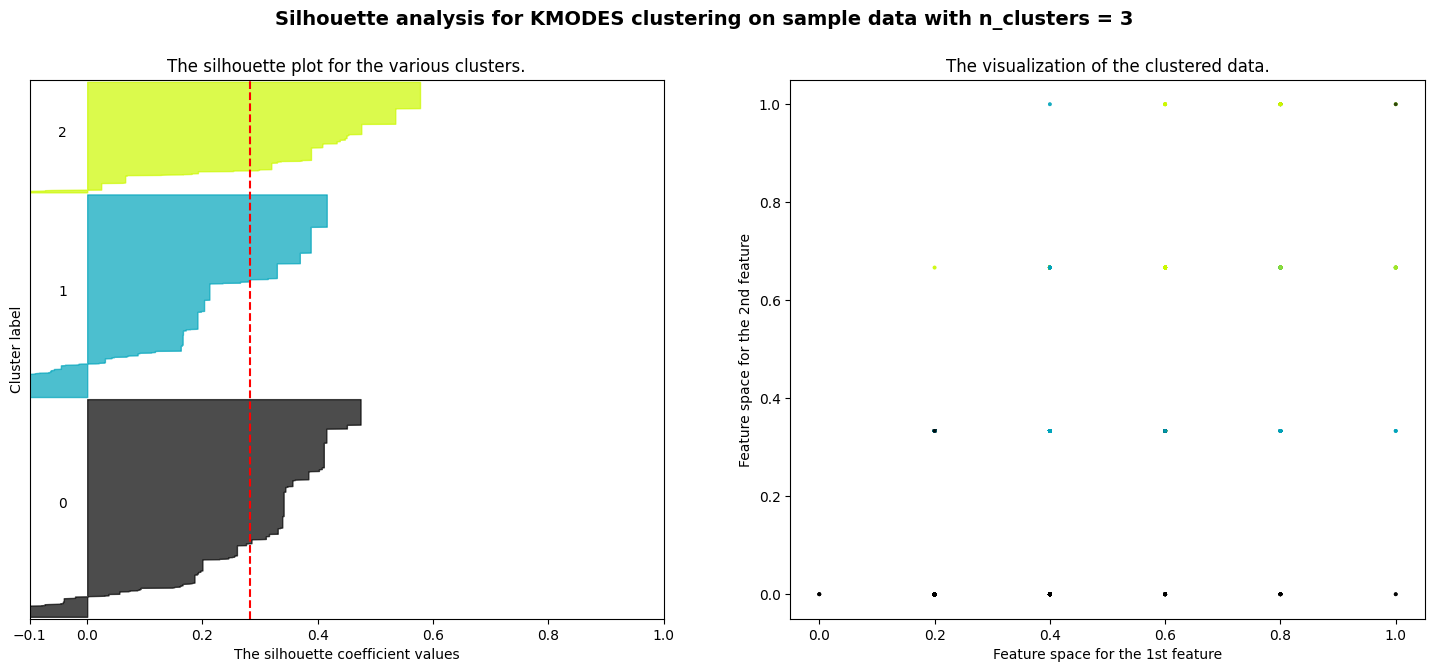

KMODES
For n_clusters = 4 The average silhouette_score is : 0.2374770890368482


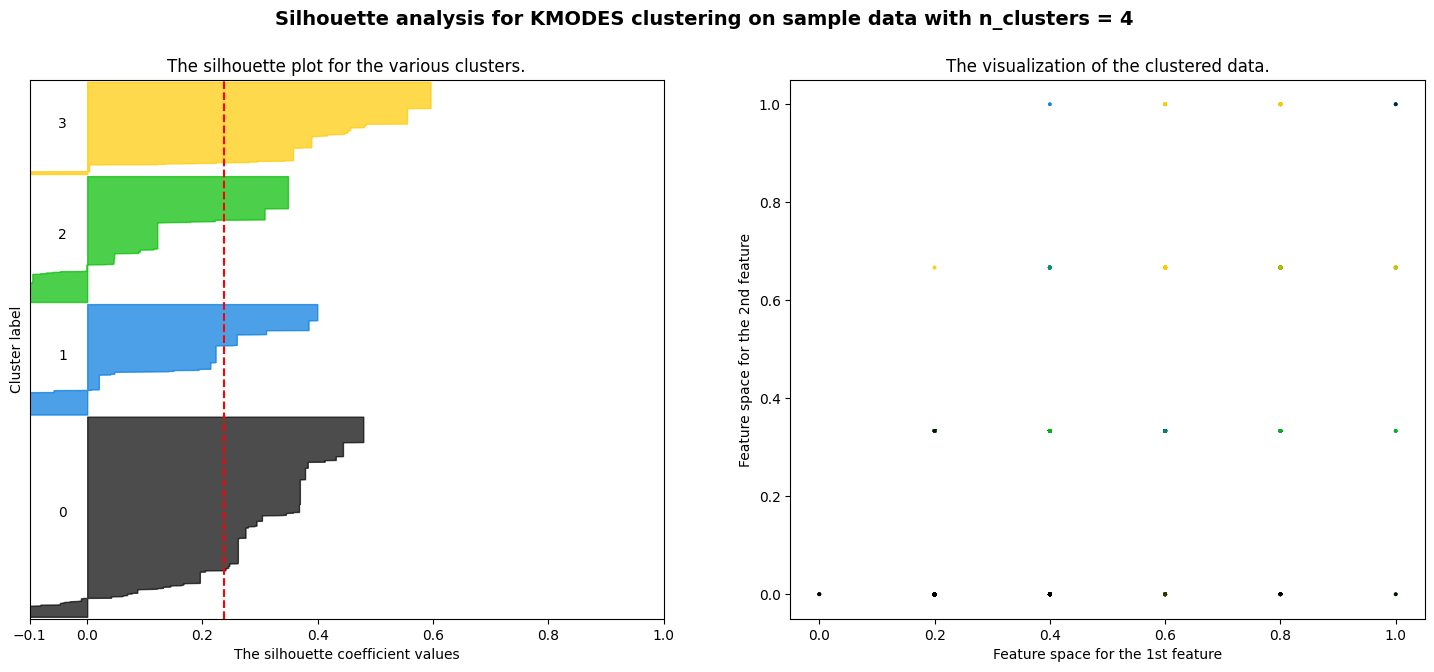

KMODES
For n_clusters = 5 The average silhouette_score is : 0.20585559474979176


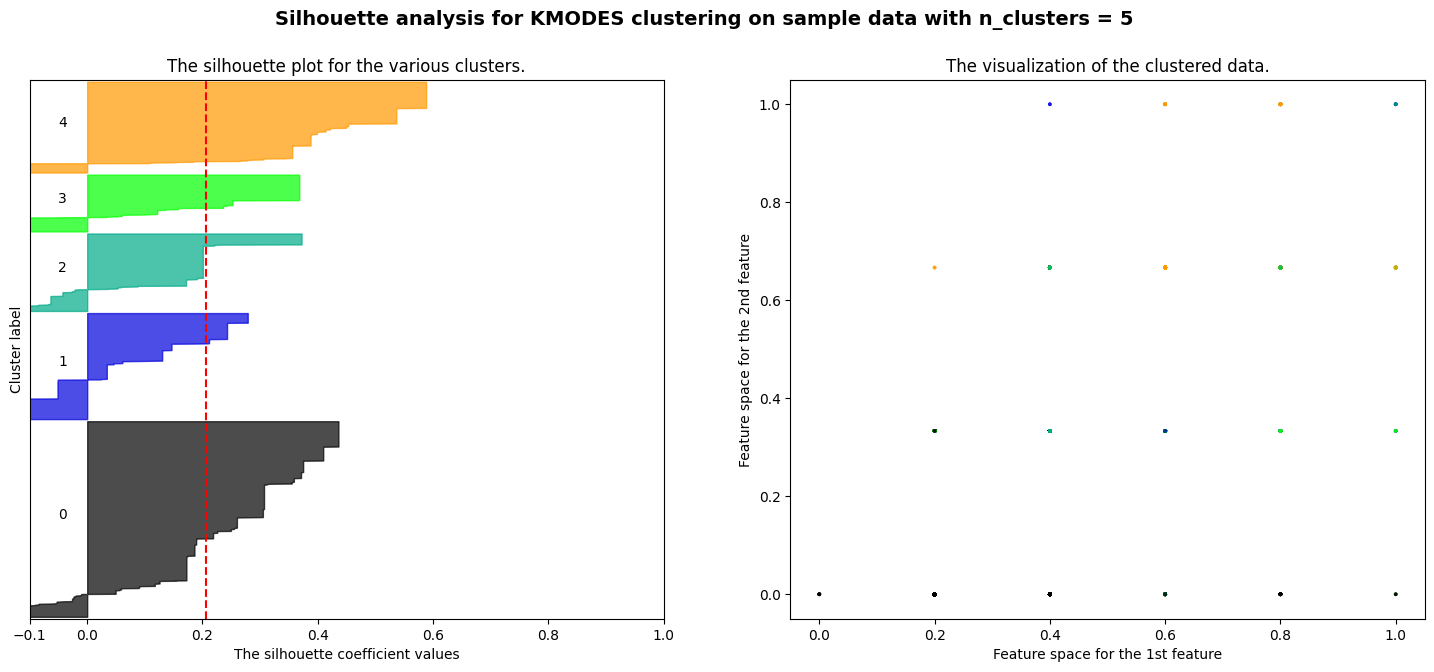

KMODES
For n_clusters = 6 The average silhouette_score is : 0.18873338724005143


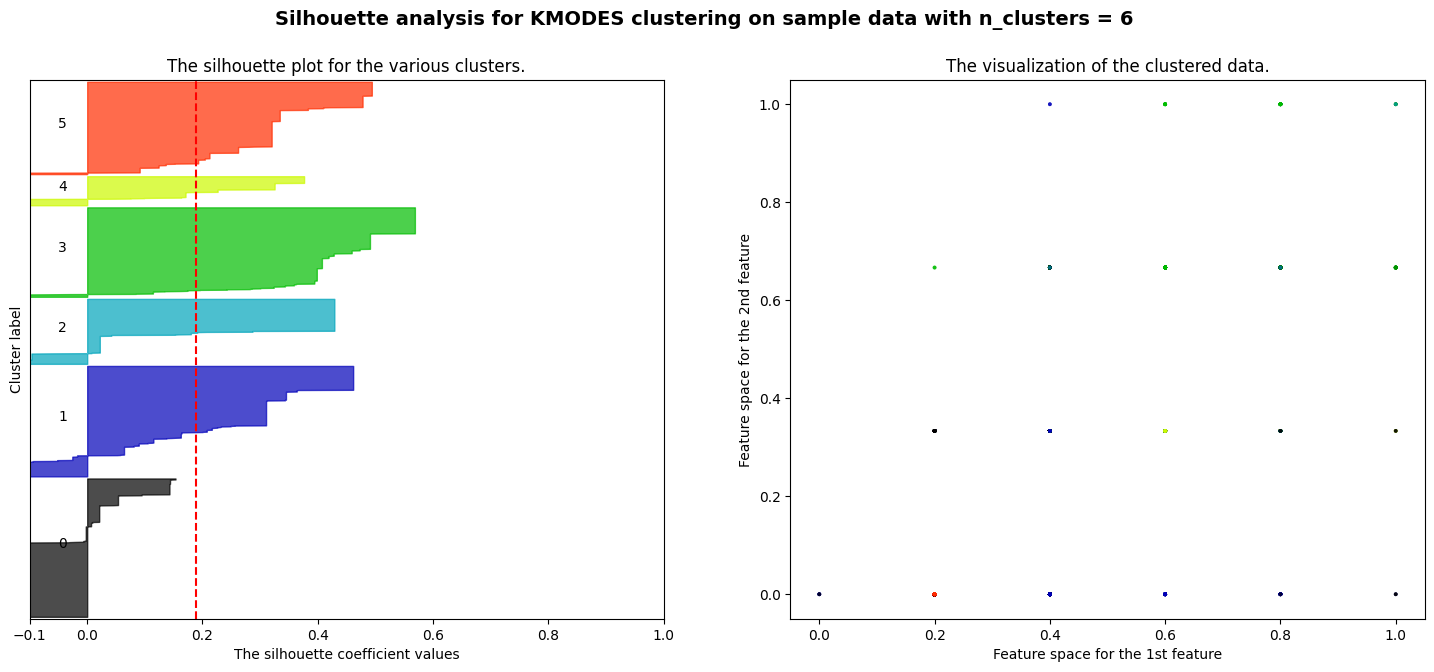

KMODES
For n_clusters = 7 The average silhouette_score is : 0.10664954030639887


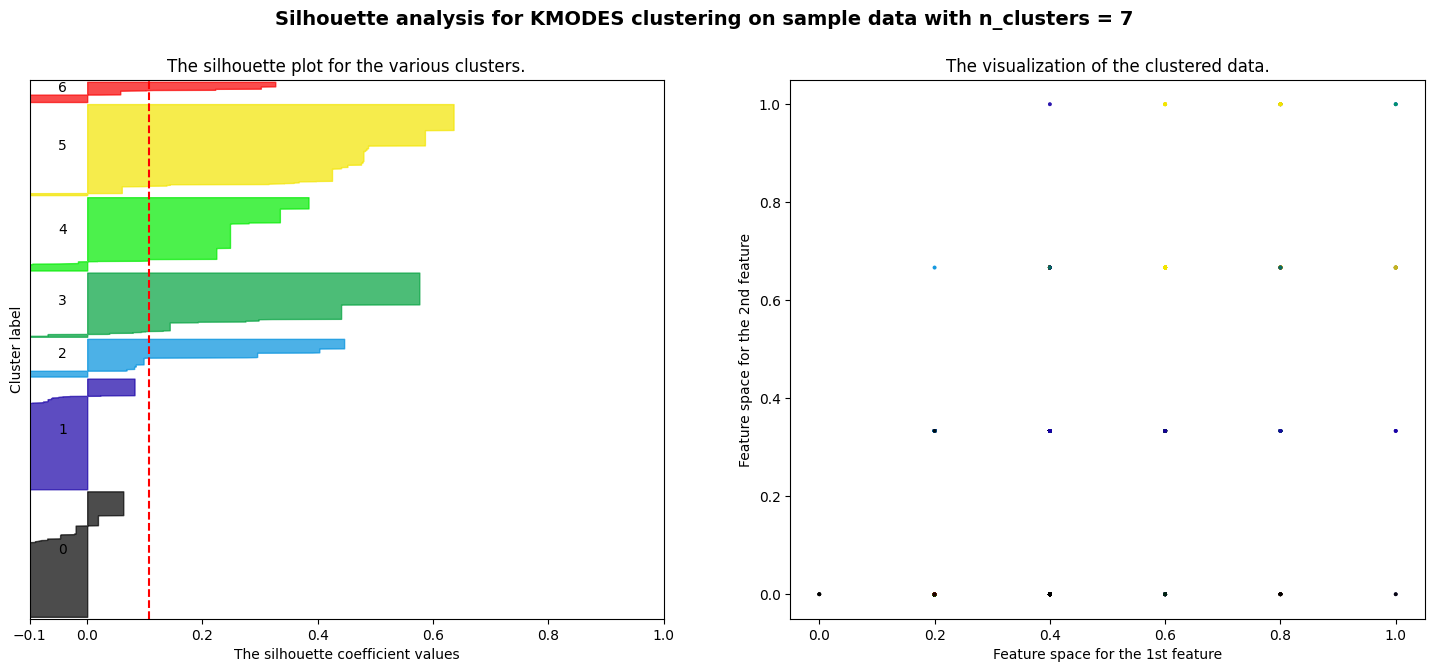

In [54]:
plot_clusters(X, k_models, range_n_clusters)

## Kmodes cat features

In [55]:
X = data_fomated[cat_features].values
k_models = {}
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []

    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    kmodes_labels = kmodes.fit_predict(X)
    models.append((kmodes,kmodes_labels,'KMODES'))
    k_models[k] = models
print("Training complete!")

Training 2 clusters ...
Training 3 clusters ...
Training 4 clusters ...
Training 5 clusters ...
Training 6 clusters ...
Training 7 clusters ...
Training complete!


KMODES
For n_clusters = 2 The average silhouette_score is : 0.3031411549258979


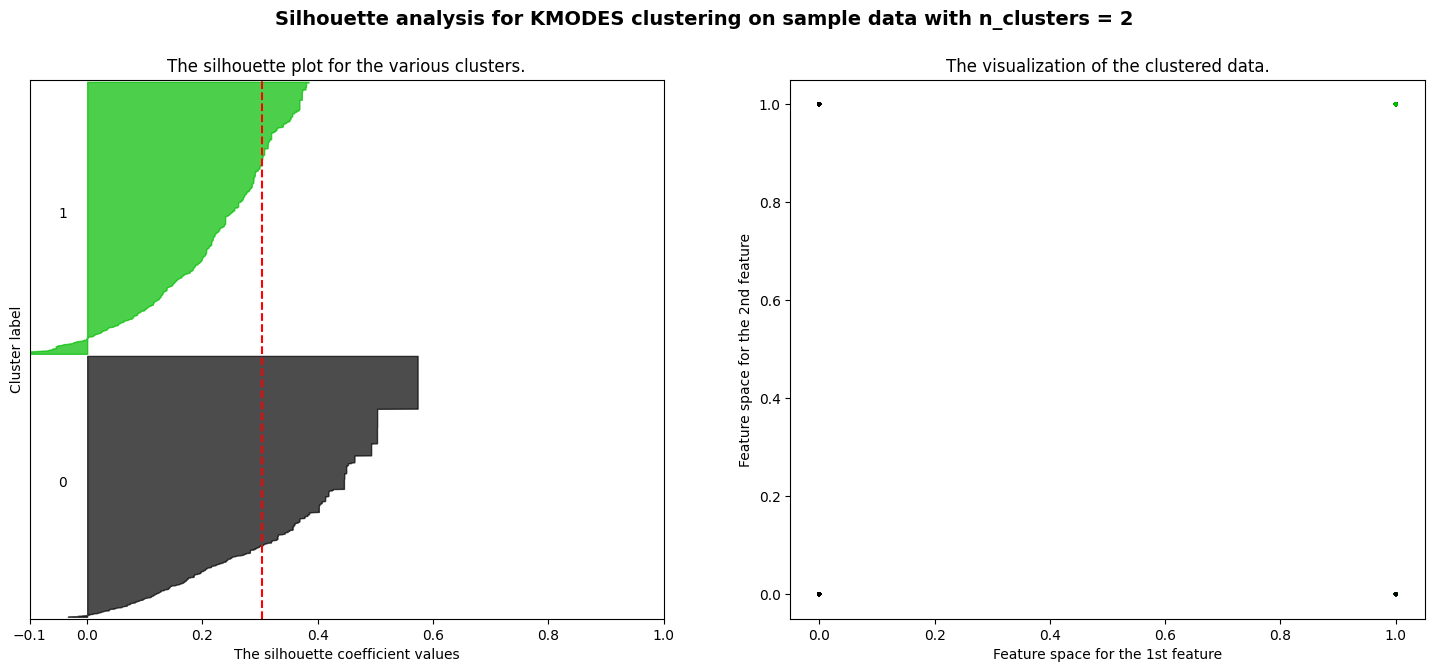

KMODES
For n_clusters = 3 The average silhouette_score is : 0.2699386293552804


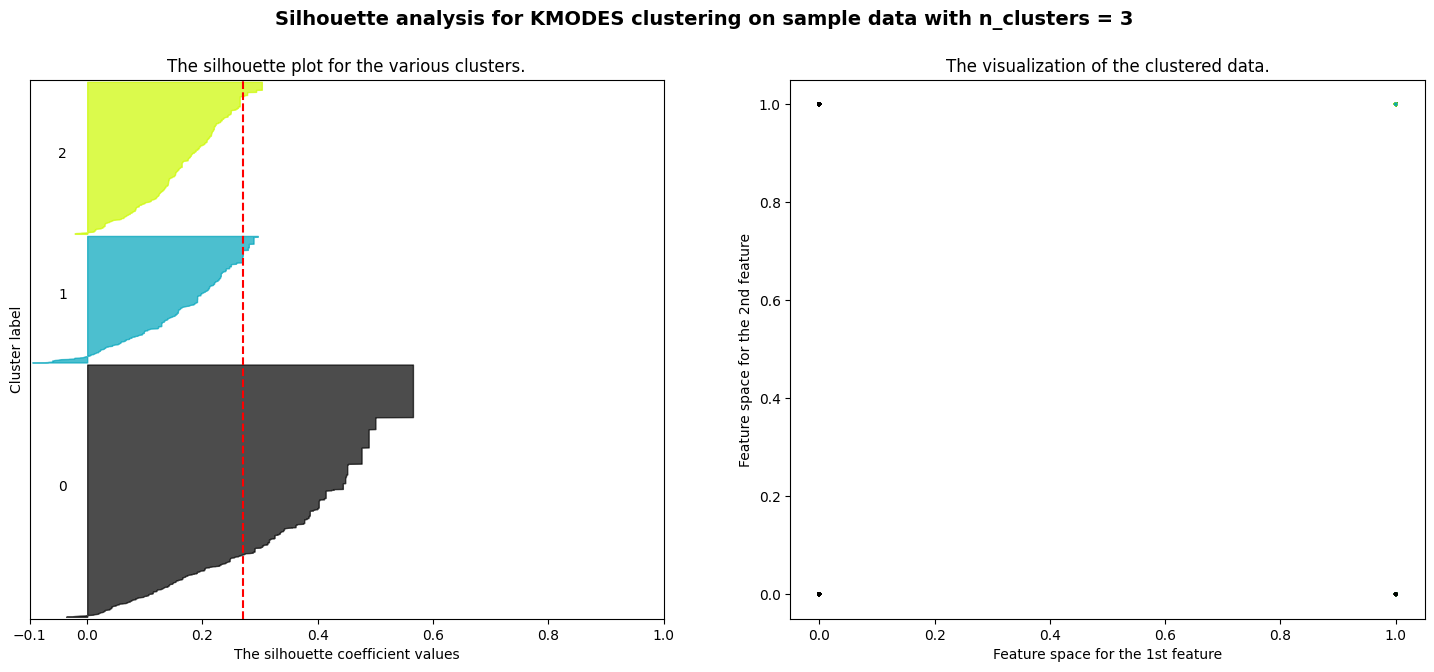

KMODES
For n_clusters = 4 The average silhouette_score is : 0.229254004316667


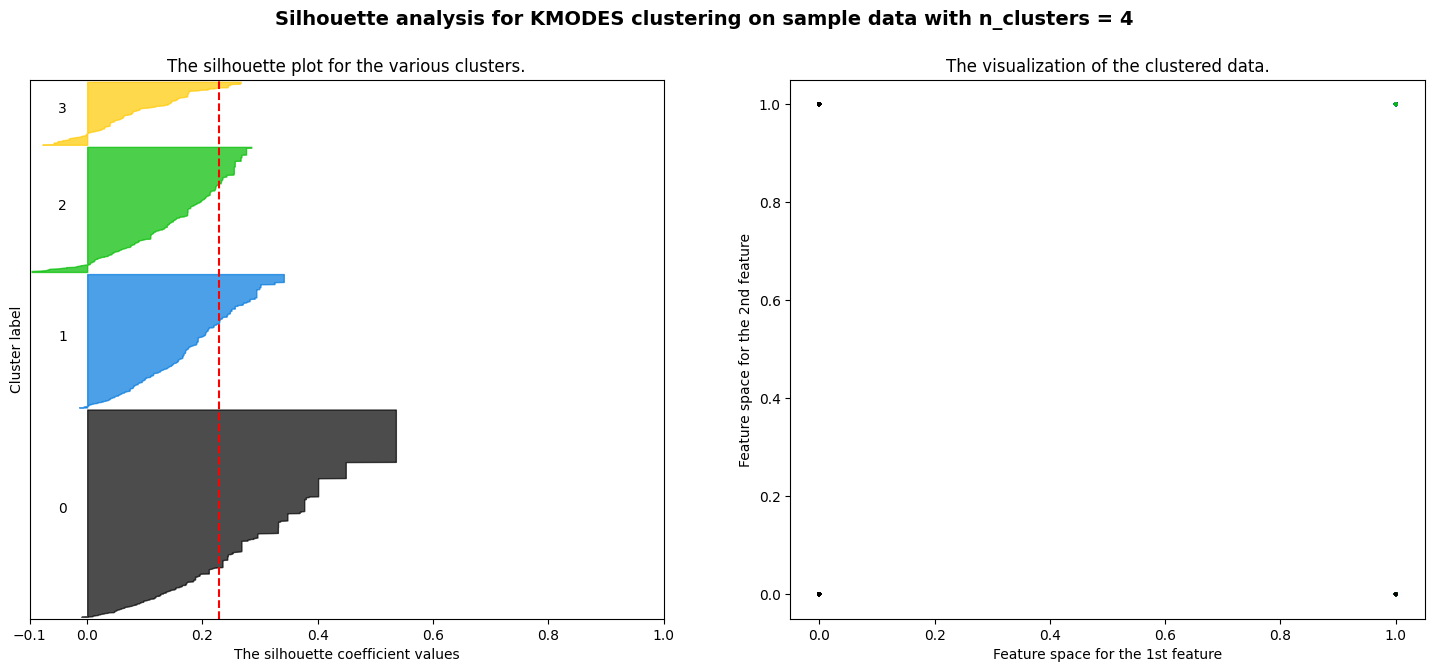

KMODES
For n_clusters = 5 The average silhouette_score is : 0.21559779571757154


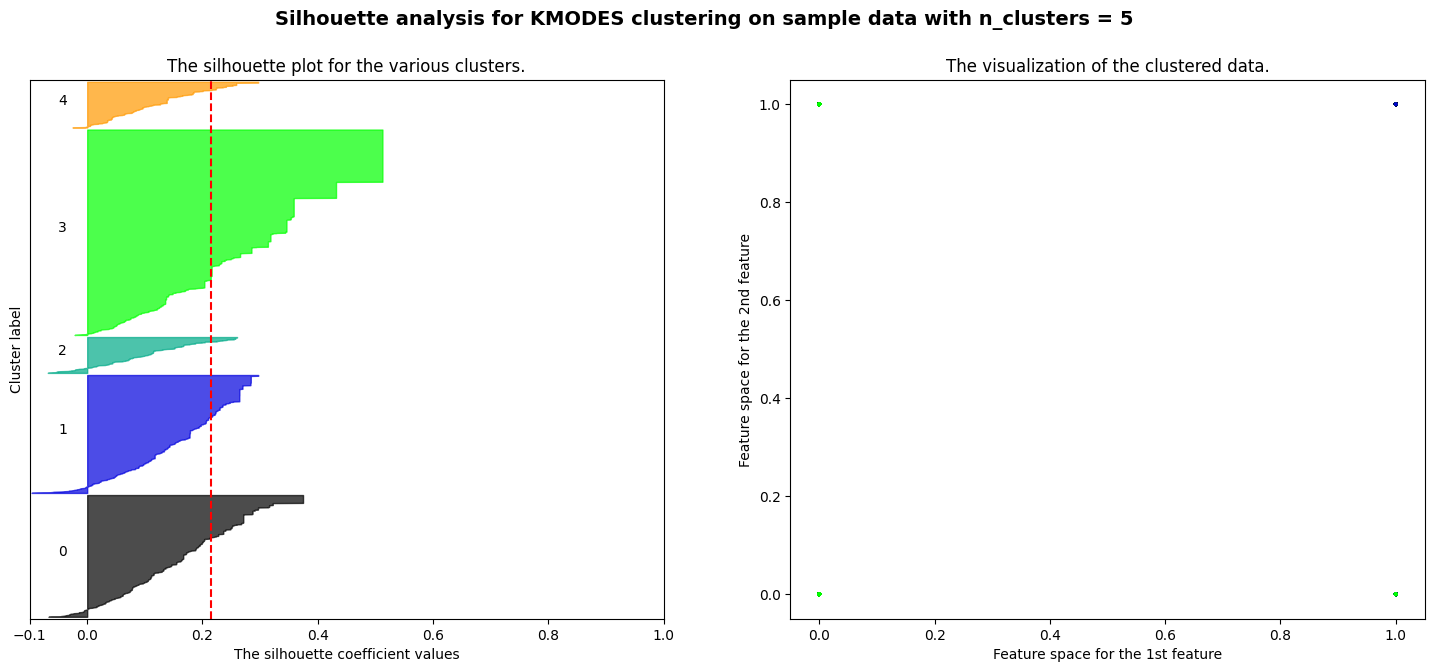

KMODES
For n_clusters = 6 The average silhouette_score is : 0.170552079498648


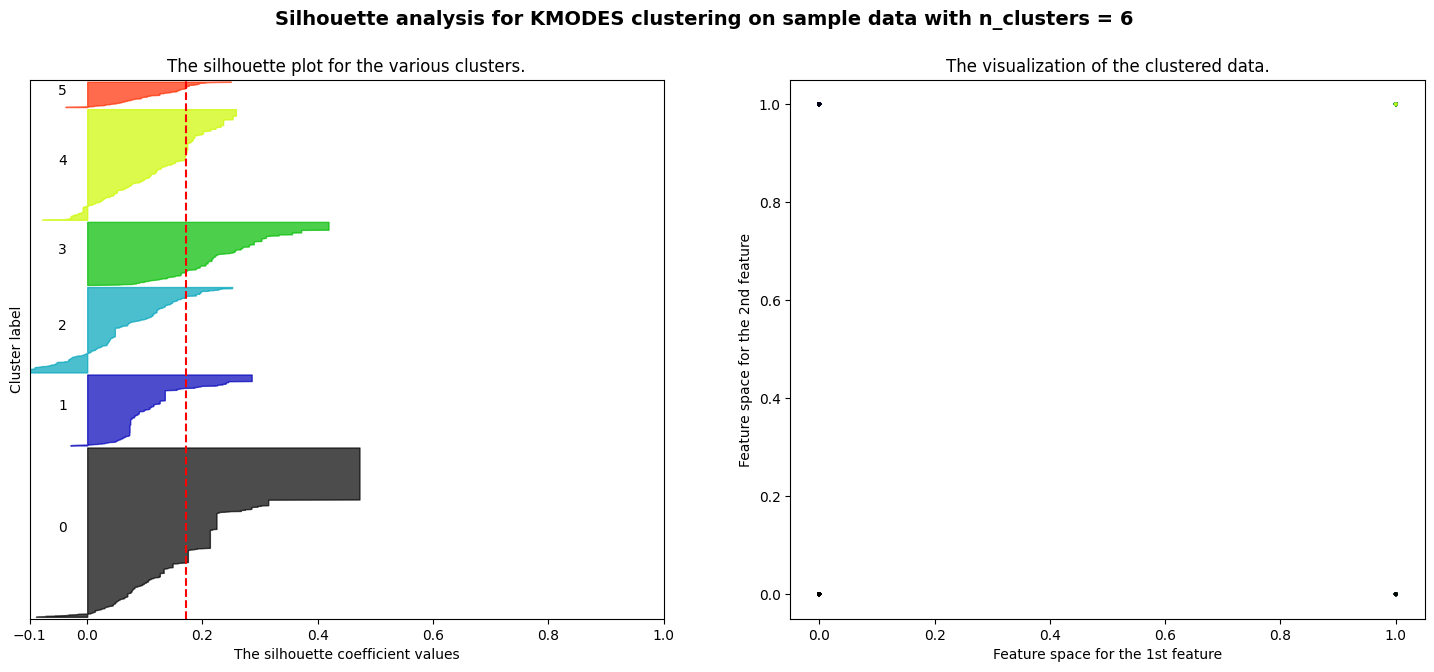

KMODES
For n_clusters = 7 The average silhouette_score is : 0.18858187212039287


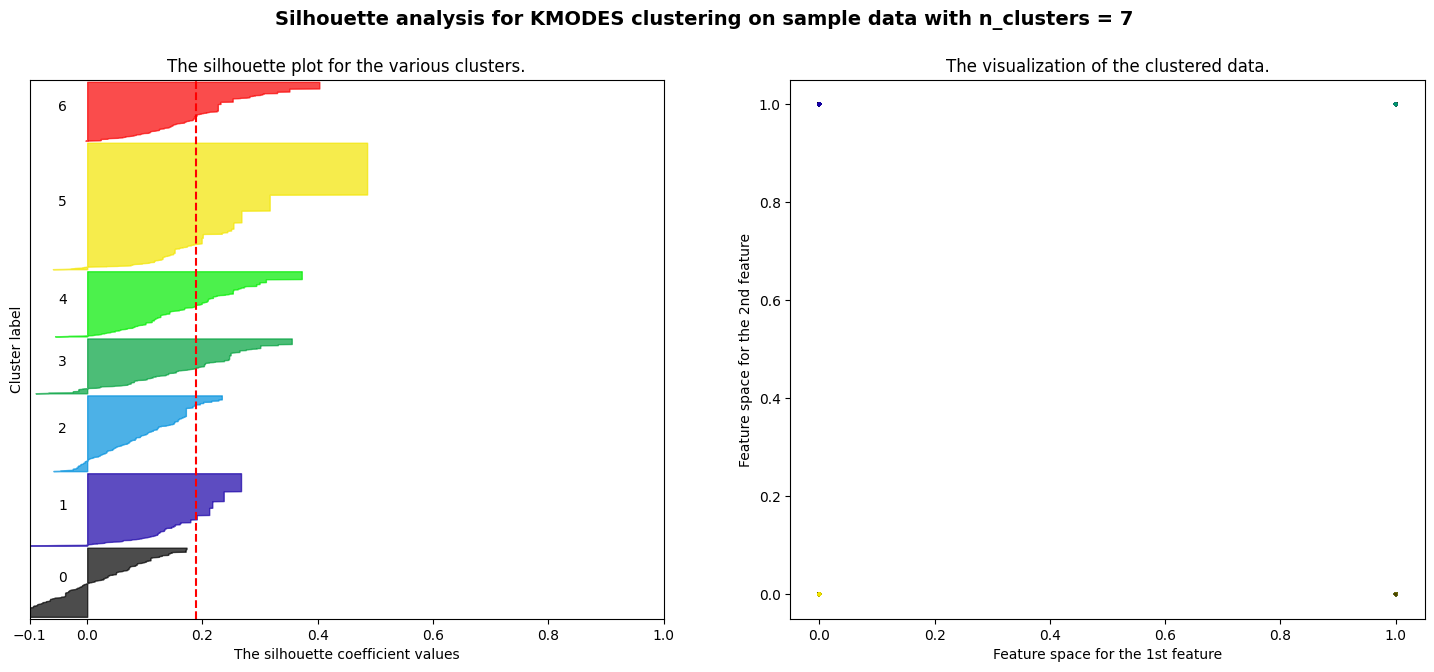

In [56]:
plot_clusters(X, k_models, range_n_clusters)

### all data

In [57]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
x_columns = data_fomated.columns
x_sclarer_cluster = scaler.fit_transform(data_fomated) # Transformación de los nuevos datos con una escala MinMax
x_sclarer_cluster = pd.DataFrame(x_sclarer_cluster, columns = x_columns)

Training 2 clusters ...
Training 3 clusters ...
Training 4 clusters ...
Training 5 clusters ...
Training 6 clusters ...
Training 7 clusters ...
Training complete!
KMEANS
For n_clusters = 2 The average silhouette_score is : 0.22963071826309356


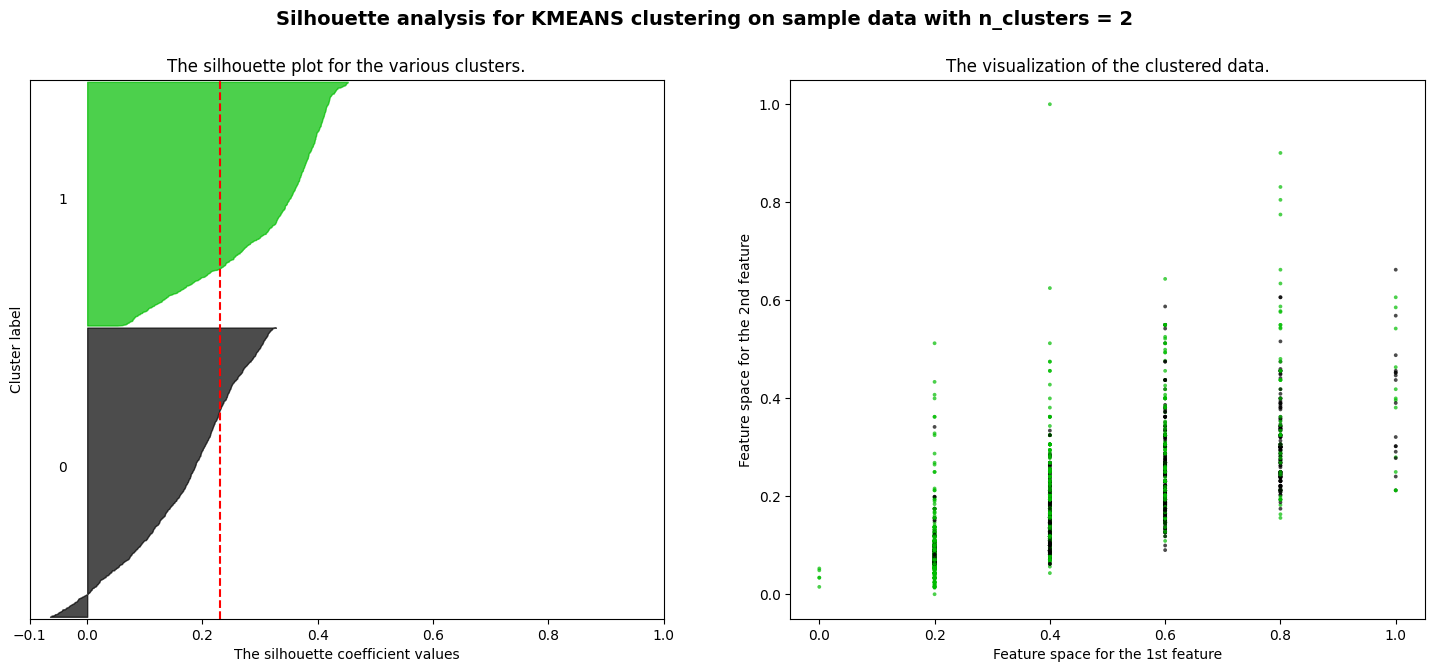

KMEANS
For n_clusters = 3 The average silhouette_score is : 0.1644308142424607


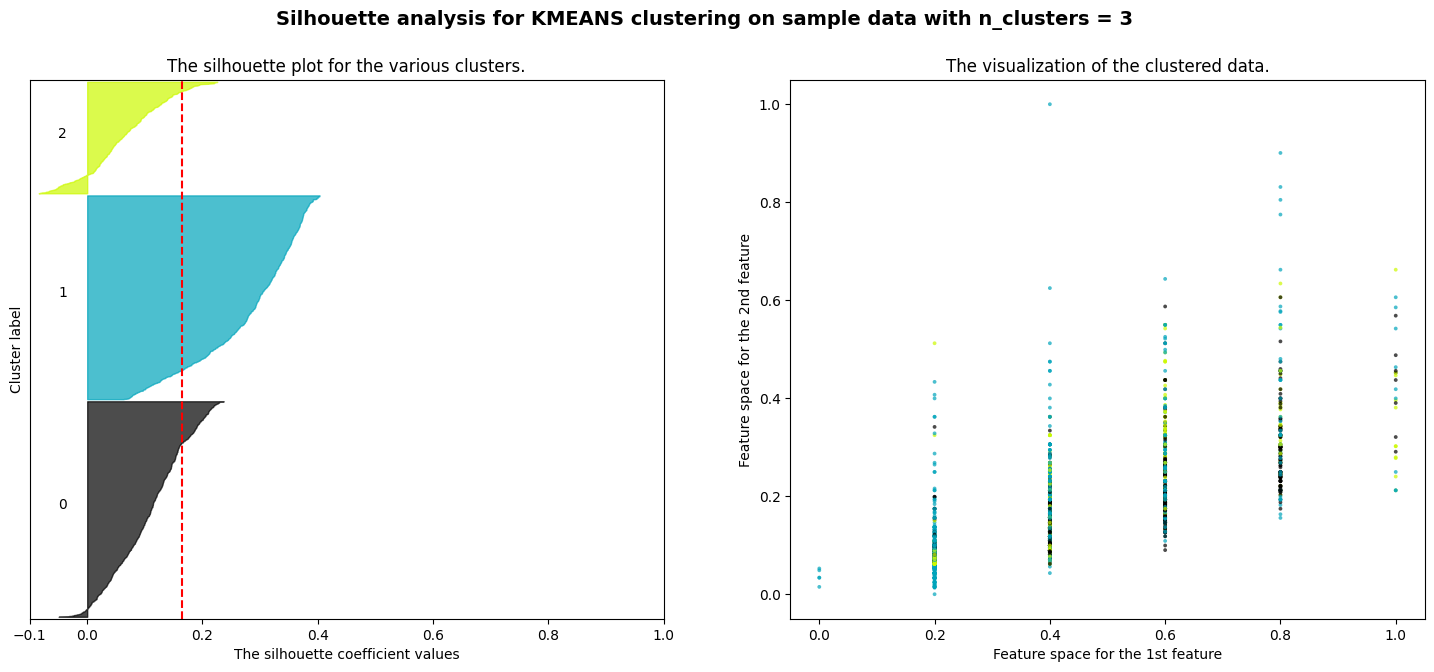

KMEANS
For n_clusters = 4 The average silhouette_score is : 0.1815726993543331


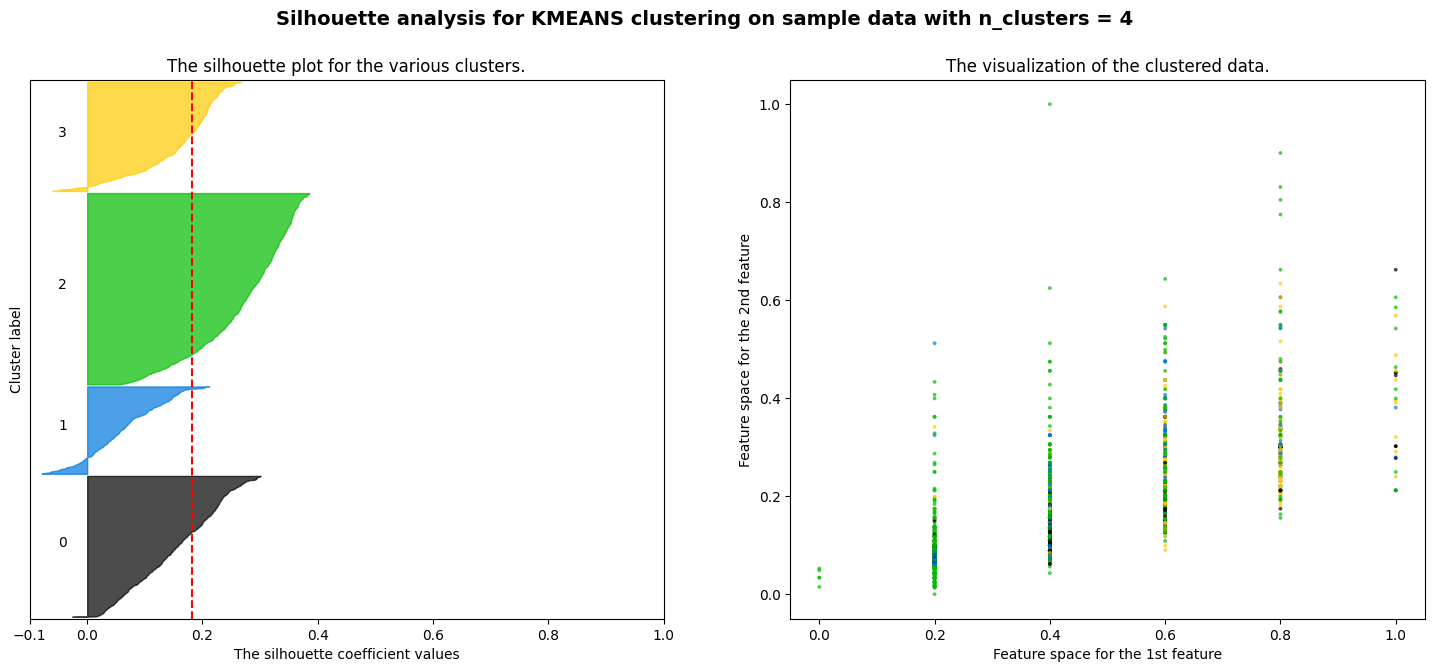

KMEANS
For n_clusters = 5 The average silhouette_score is : 0.1230076051091828


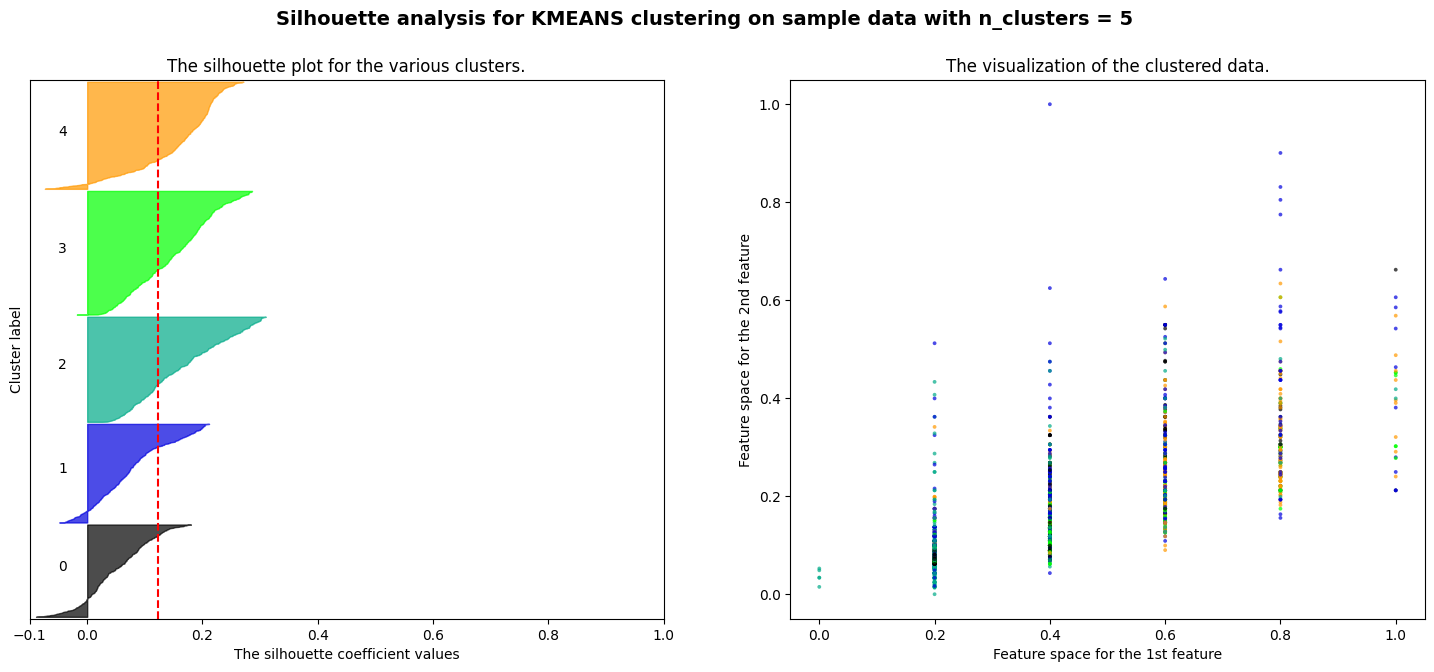

KMEANS
For n_clusters = 6 The average silhouette_score is : 0.1263452943960597


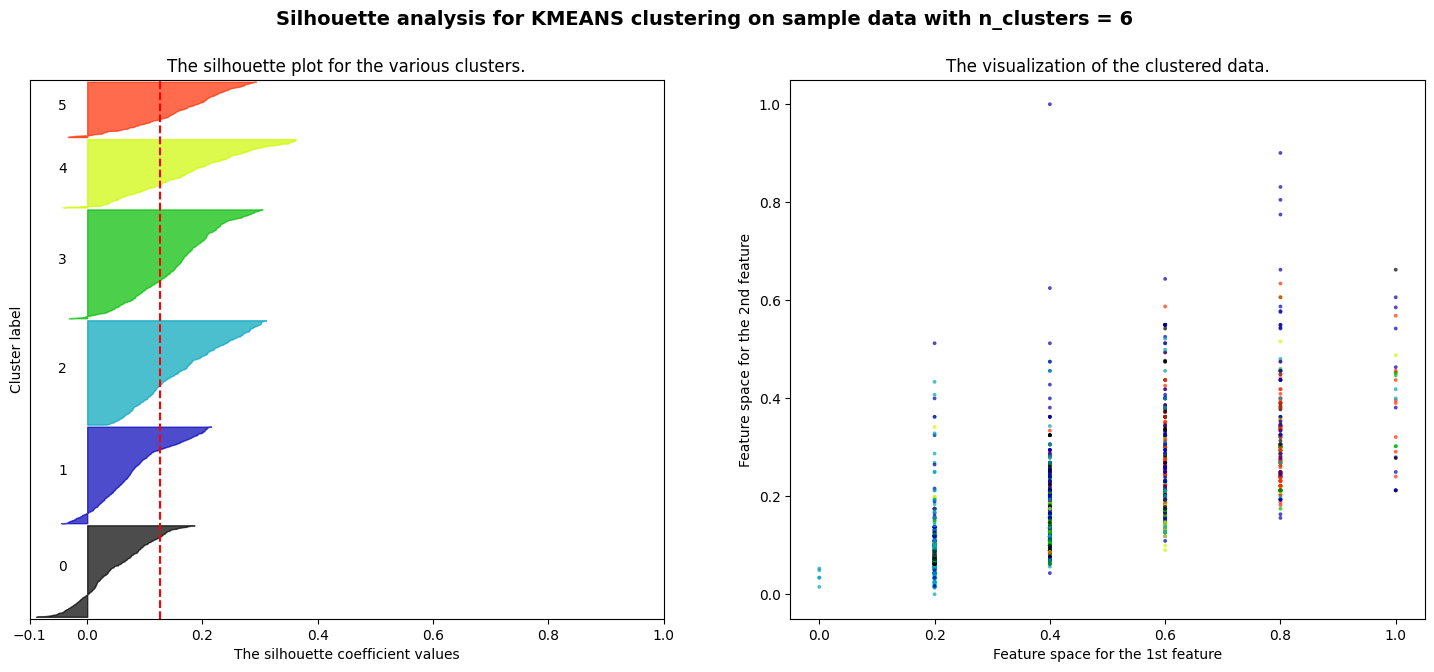

KMEANS
For n_clusters = 7 The average silhouette_score is : 0.1238306842544997


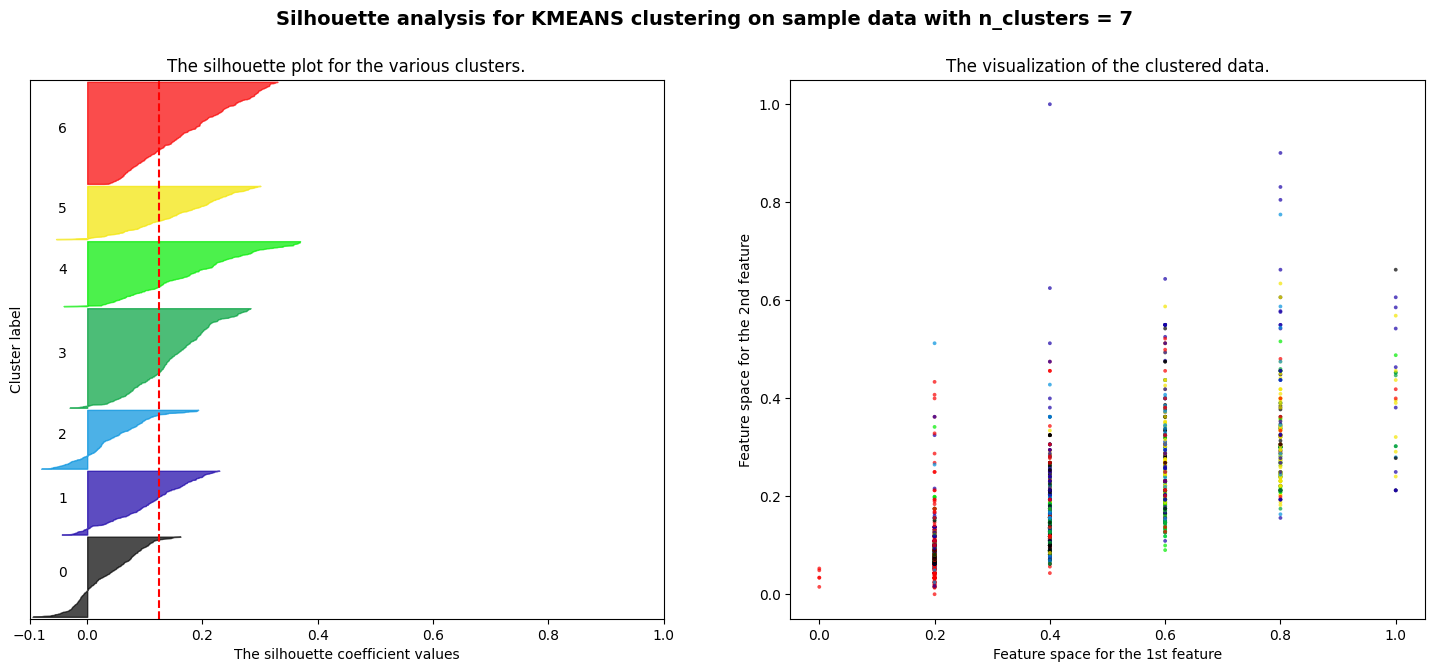

In [58]:
X = x_sclarer_cluster.values
k_models = {}
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []

    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans_labels = kmeans.fit_predict(X)
    models.append((kmeans,kmeans_labels,'KMEANS'))
    k_models[k] = models
print("Training complete!")
plot_clusters(X, k_models, range_n_clusters)

In [59]:
X = x_sclarer_cluster.values
k_models = {}
for k in range_n_clusters:
    print(f"Training {k} clusters ...")
    models = []

    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    kmodes_labels = kmodes.fit_predict(X)
    models.append((kmodes,kmodes_labels,'KMODES'))
    k_models[k] = models
print("Training complete!")

Training 2 clusters ...
Training 3 clusters ...
Training 4 clusters ...
Training 5 clusters ...
Training 6 clusters ...
Training 7 clusters ...
Training complete!


KMODES
For n_clusters = 2 The average silhouette_score is : 0.2194407539768925


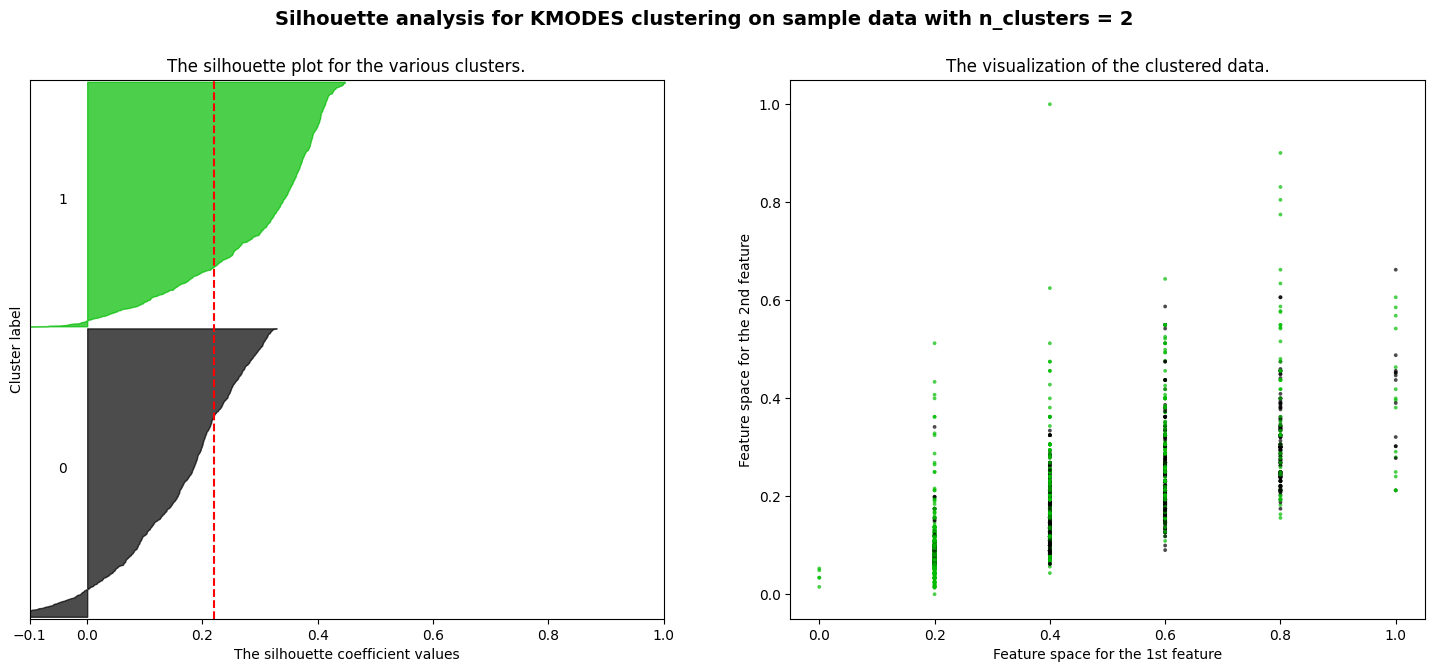

KMODES
For n_clusters = 3 The average silhouette_score is : 0.19591500641619614


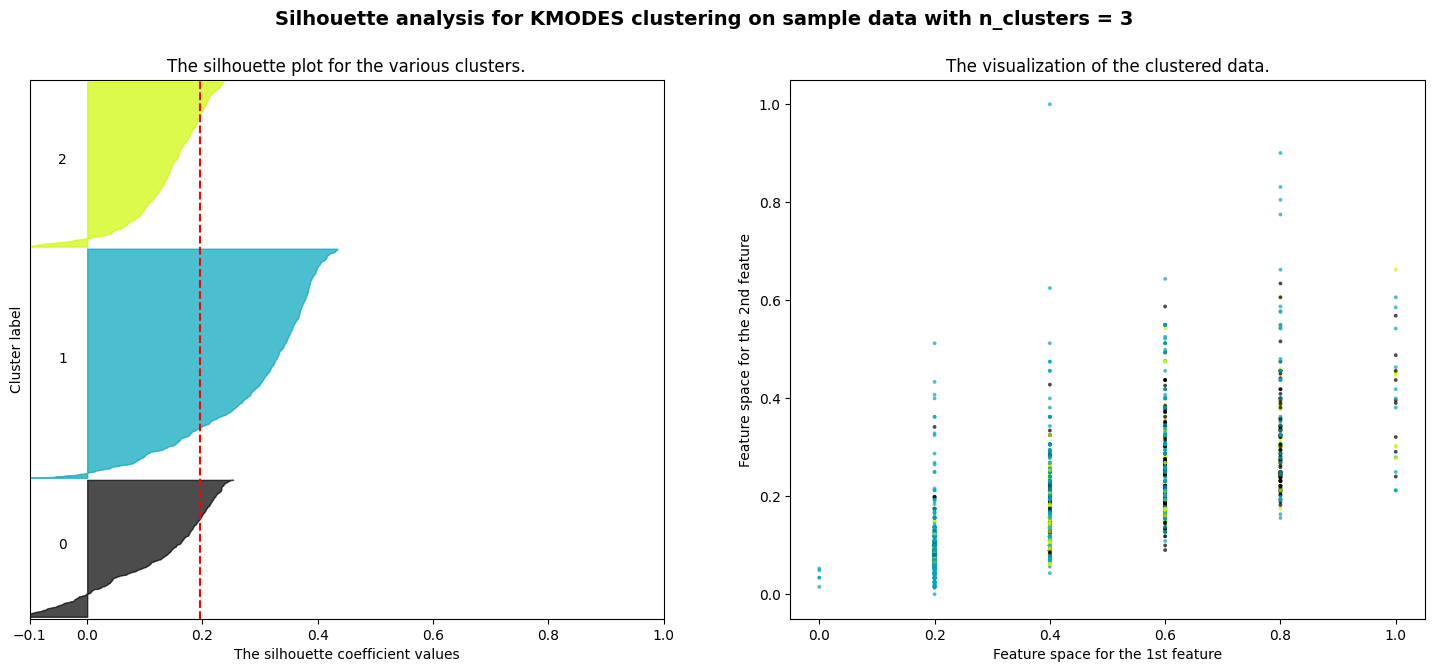

KMODES
For n_clusters = 4 The average silhouette_score is : 0.14219179605971502


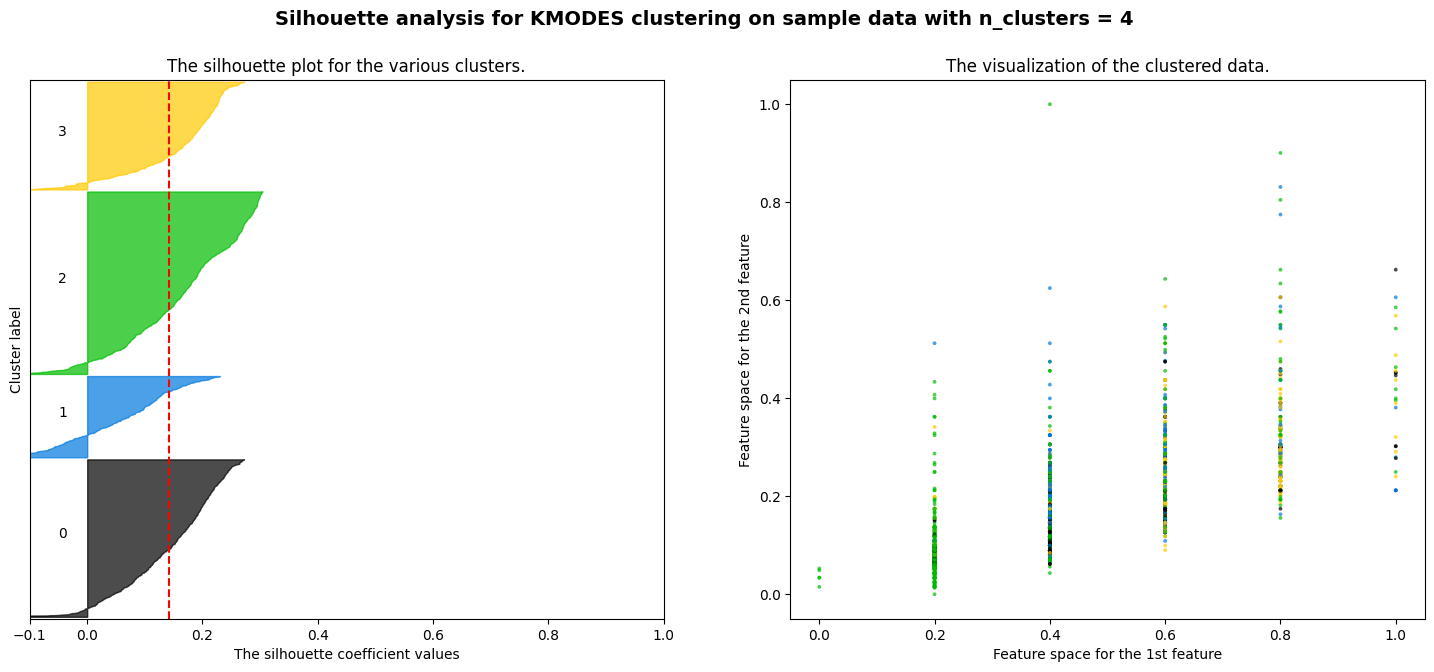

KMODES
For n_clusters = 5 The average silhouette_score is : 0.1565601963864397


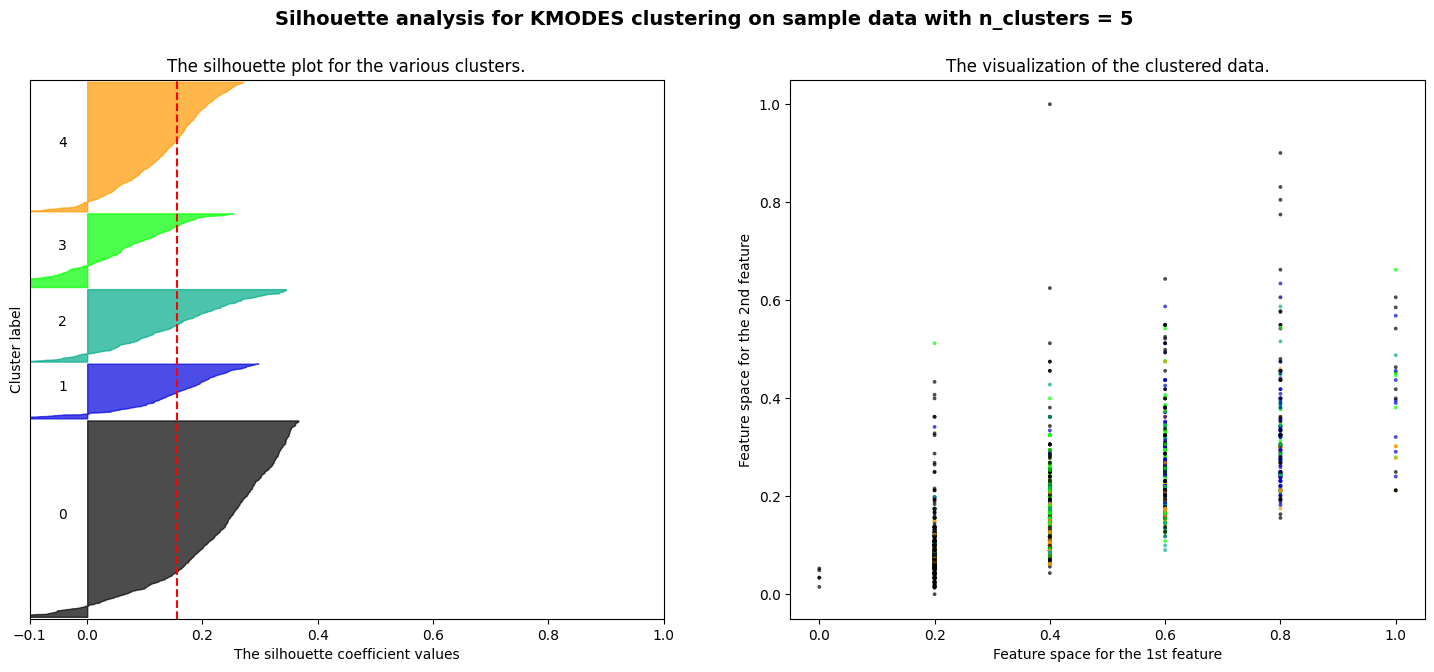

KMODES
For n_clusters = 6 The average silhouette_score is : 0.12325821288230741


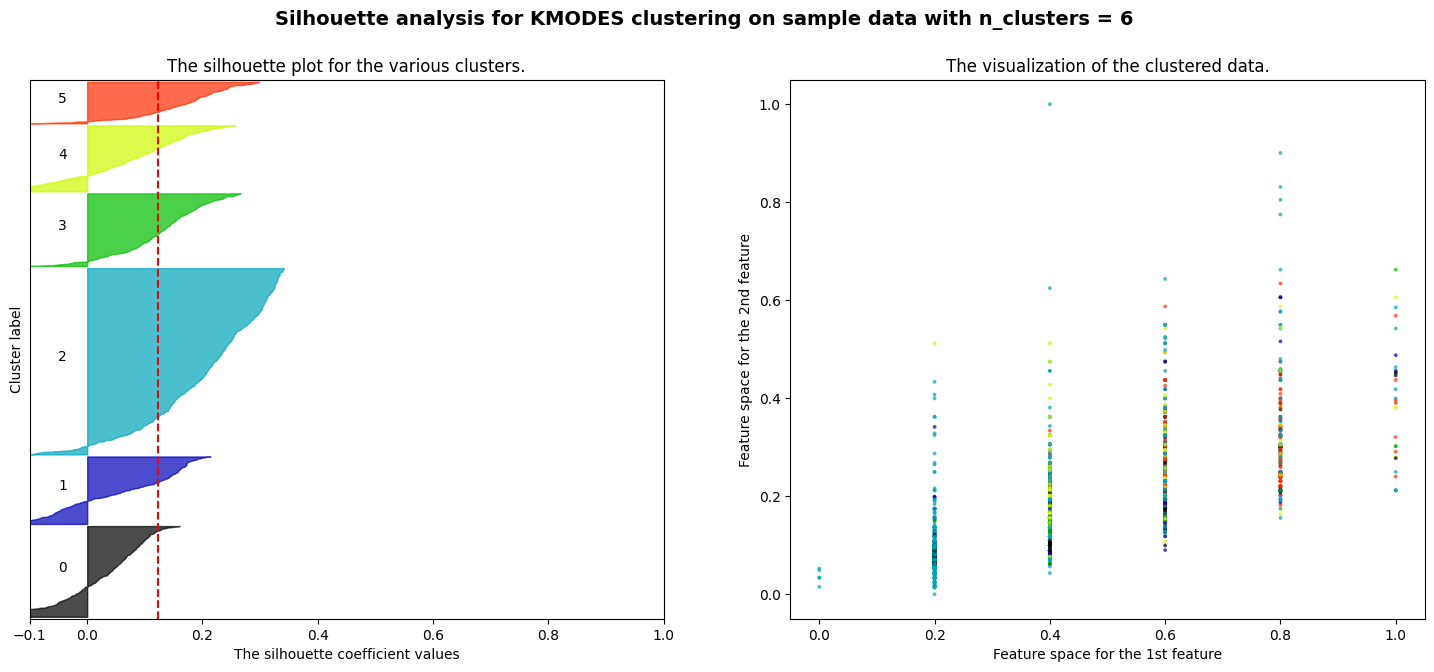

KMODES
For n_clusters = 7 The average silhouette_score is : 0.09541439852242393


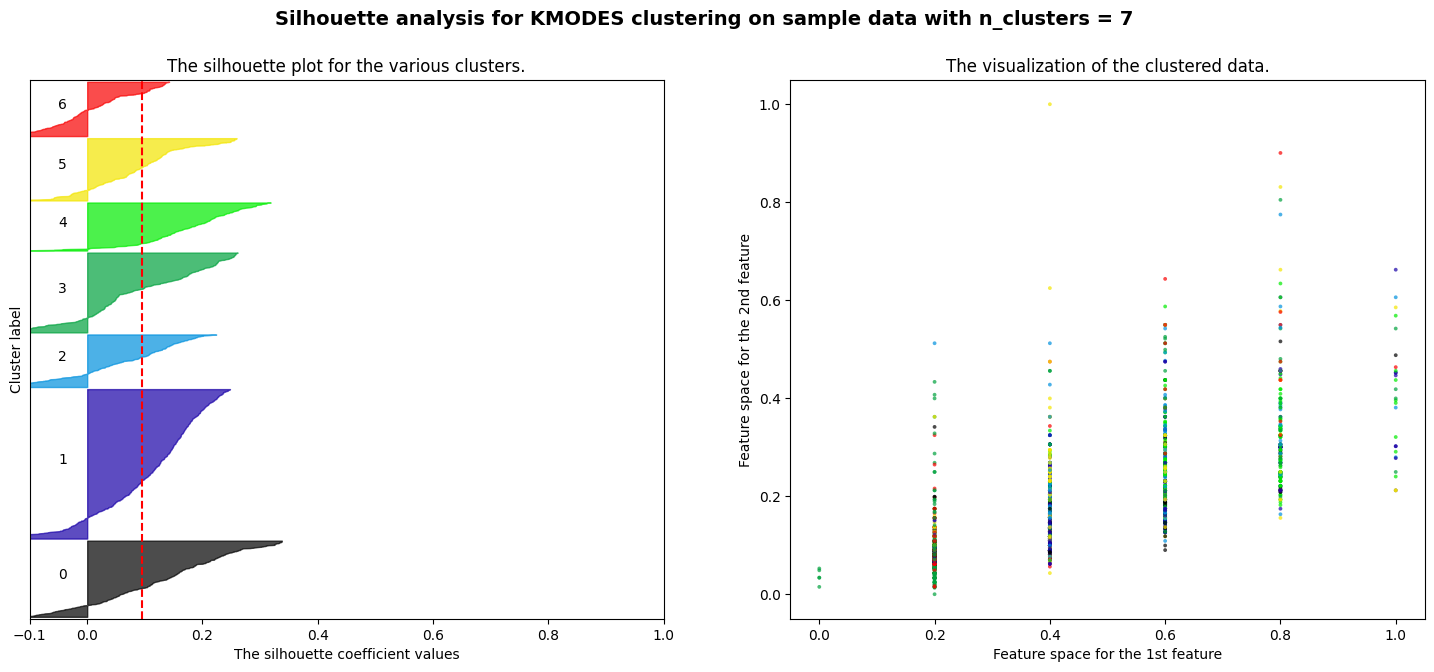

In [60]:
plot_clusters(X, k_models, range_n_clusters)

In [89]:
from sklearn.metrics import mean_absolute_percentage_error

In [86]:
data_price_area.groupby('cluster').agg({'precio' : ['min', 'max']})

precio           
               min        max
cluster                      
0         530000.0  2550000.0
1        2600000.0  4800000.0
2        4850000.0  7500000.0

In [87]:
pred_data = pd.read_csv('RandomForestPredictions.csv')
pred_data.head()

baños_familiares  area_bruta  parqueaderos  alcobas_familiares   estrato   
0               0.2    0.033771      0.000000                 0.2  0.500000  \
1               0.4    0.118199      0.000000                 0.6  0.000000   
2               0.2    0.061914      0.000000                 0.2  0.666667   
3               0.2    0.056285      0.000000                 0.0  0.833333   
4               0.4    0.238274      0.666667                 0.6  1.000000   

   juegos_infantiles  balcon  camaras_cctv  ascensor  unidad_cerrada_conjunto   
0                0.0     0.0           0.0       0.0                      0.0  \
1                0.0     0.0           0.0       1.0                      0.0   
2                0.0     0.0           0.0       0.0                      0.0   
3                0.0     0.0           0.0       0.0                      0.0   
4                1.0     1.0           0.0       1.0                      1.0   

   ...  closet_de_linos  biblioteca  parqueadero_visitantes  gimnasio   
0  ...              0.0         0.0                     0.0       0.0  \
1  ...              0.0         0.0                     0.0       0.0   
2  ...              0.0         0.0                     0.0       0.0   
3  ...              0.0         0.0                     0.0       0.0   
4  ...              0.0         0.0                     1.0       1.0   

   piscina  salon_social  tipo_cocina_freq  tipo_pisos_freq     precio   
0      0.0           0.0               1.0         1.000000   900000.0  \
1      0.0           0.0               1.0         1.000000  1600000.0   
2      0.0           0.0               1.0         1.000000  1650000.0   
3      0.0           0.0               1.0         1.000000  1800000.0   
4      1.0           1.0               1.0         0.279021  5500000.0   

    precio_pred  
0  1.134505e+06  
1  1.923030e+06  
2  1.377584e+06  
3  2.060546e+06  
4  4.930371e+06  

[5 rows x 24 columns]

In [88]:
eval_cols = ['precio', 'precio_pred']
preds_cluster_0 = pred_data[(pred_data['precio'] >= 530000.0) & (pred_data['precio'] <= 2550000.0)][eval_cols]
preds_cluster_1 = pred_data[(pred_data['precio'] >= 2600000.0) & (pred_data['precio'] <= 4800000.0)][eval_cols]
preds_cluster_2 = pred_data[(pred_data['precio'] >= 4850000.0) & (pred_data['precio'] <= 7500000.0)][eval_cols]

In [90]:
mape_cluster_0 = mean_absolute_percentage_error(y_true=preds_cluster_0['precio'], y_pred=preds_cluster_0['precio_pred'])
print(f"MAPE for cluster 0 : {mape_cluster_0}")

MAPE for cluster 0 : 0.28541426527963243


In [91]:
mape_cluster_1 = mean_absolute_percentage_error(y_true=preds_cluster_1['precio'], y_pred=preds_cluster_1['precio_pred'])
print(f"MAPE for cluster 0 : {mape_cluster_1}")

MAPE for cluster 0 : 0.1570461008624418


In [92]:
mape_cluster_2 = mean_absolute_percentage_error(y_true=preds_cluster_2['precio'], y_pred=preds_cluster_2['precio_pred'])
print(f"MAPE for cluster 0 : {mape_cluster_2}")

MAPE for cluster 0 : 0.21359820618570755
